# Library

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time
from numpy import concatenate
import numpy as np

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from tensorflow.python.keras.layers import Dense, SimpleRNN, Dropout
from tensorflow.python.keras import Sequential
from math import sqrt;
import tensorflow as tf

# Preprocessing

## Import data

In [25]:
# import data
url = "https://drive.google.com/file/d/1_LBzbPCrkDpksT37LZoIRs8NyeOocCyr/view?usp=share_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url, parse_dates = True,index_col=0)
df.head()

Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-11-01 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-11-01 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-11-01 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-11-01 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-11-01 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4  ...         T9  \
date                                                         ...              
2016-11-01 17:00:00  19.79  44.730000  19.000000  45.566667  ...  17.033333   
2016-11-01 17:10:00  19.79  44.790000  19.000000  45.992500  ...  17.066667   
2016-11-01 17:20:00  19.79  44.933333  18.926667  45.890000  ...  17.000000   
2016-11-01 17:30:00  19.79  45.000000  18.890000  45.723333  ...  17.000000   
2016-11-01 17:40:00  19.79  45.000000  18.890000  45.530000  ...  17.000000   

                      RH_9  T_out  Press_mm_hg  RH_out  Windspeed  Visibility  \
date                                                                            
2016-11-01 17:00:00  45.53   6.60        733.5    92.0   7.000000   63.000000   
2016-11-01 17:10:00  45.56   6.48        733.6    92.0   6.666667   59.166667   
2016-11-01 17:20:00  45.50   6.37        733.7    92.0   6.333333   55.333333   
2016-11-01 17:30:00  45.40   6.25        733.8    92.0   6.000000   51.500000   
2016-11-01 17:40:00  45.40   6.13        733.9    92.0   5.666667   47.666667   

                     Tdewpoint        rv1        rv2  
date                                                  
2016-11-01 17:00:00        5.3  13.275433  13.275433  
2016-11-01 17:10:00        5.2  18.606195  18.606195  
2016-11-01 17:20:00        5.1  28.642668  28.642668  
2016-11-01 17:30:00        5.0  45.410390  45.410390  
2016-11-01 17:40:00        4.9  10.084097  10.084097  

[5 rows x 28 columns]

In [26]:
df.shape

(19735, 28)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-11-01 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [28]:
df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.412580    755.522602   
std    ...      2.014712      4.151497      5.318464      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.670000    750.933333   
50%    ...     19.390000     40.900000      6.920000    756.100000   
75%    ...     20.600000     44.338095     10.400000    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760995     24.988033   
std       14.901088      2.451221     11.794719      4.195248     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.430000     24.897653   
75%       91.666667      5.500000     40.000000      6.570000     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [29]:
# Jumlah missing value
df.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

<AxesSubplot:xlabel='date'>

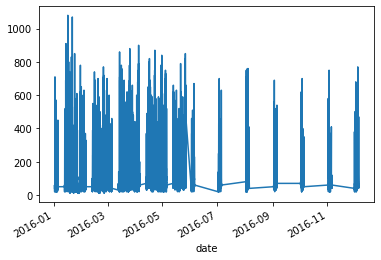

In [30]:
df['Appliances'].plot()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Appliances', ylabel='Density'>

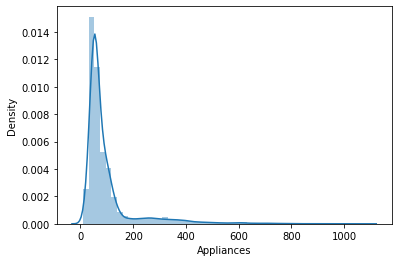

In [31]:
sns.distplot(df['Appliances'])

In [32]:
# Correlation matrix
df.corr()['Appliances']

Appliances     1.000000
lights         0.197278
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015357
rv1           -0.011145
rv2           -0.011145
Name: Appliances, dtype: float64

Feature Extraction (Skenario Atribut)

In [33]:
# Data 1
# All
# df_new = df

# tanpa minus
# df_new = df.drop(df.columns[[5, 13, 15, 17, 19, 21, 22, 26, 27]], axis=1)

# 5 teratas
# df_new = df.drop(df.columns[[2, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27]], axis=1)

# 3 teratas
# df_new = df.drop(df.columns[[2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

# 1 teratas
df_new = df.drop(df.columns[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]], axis=1)

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-11-01 17:00:00 to 2016-05-27 18:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Appliances  19735 non-null  int64
dtypes: int64(1)
memory usage: 308.4 KB


In [35]:
values = df_new.values

In [36]:
values.shape

(19735, 1)

## Normalisasi

In [37]:
# MinMax
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [14]:
# Z-score
# scaled = stats.zscore(values, axis = 0)

#Z-Score
scaler = StandardScaler()
scaled = scaler.fit_transform(values)

## Convert to Time Series

In [38]:
#covert to time-series
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [39]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

var1(t-1)   var1(t)
1   0.046729  0.046729
2   0.046729  0.037383
3   0.037383  0.037383
4   0.037383  0.046729
5   0.046729  0.037383

In [40]:
reframed.shape

(19734, 2)

In [41]:
# Data 1

# All
# reframed.drop(reframed.columns[[x for x in range(29, 56)]], axis=1, inplace=True)

# no minus
# reframed.drop(reframed.columns[[x for x in range(20, 38)]], axis=1, inplace=True)

# Top 5
# reframed.drop(reframed.columns[[x for x in range(7, 12)]], axis=1, inplace=True)

# Top 3
# reframed.drop(reframed.columns[[x for x in range(5, 8)]], axis=1, inplace=True)

reframed.head()

var1(t-1)   var1(t)
1   0.046729  0.046729
2   0.046729  0.037383
3   0.037383  0.037383
4   0.037383  0.046729
5   0.046729  0.037383

## Split data

In [ ]:
#split into train and test sets
values = reframed.values
# n_train = round(values.shape[0])

train = values[:, :]
test = values[:, :]

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshap input menjadi 3D ([)samples, timesteps, features)
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

# Model Building

### Random Search

In [ ]:
#design network SimpleRNN
model = Sequential()
model.add(SimpleRNN(53, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mae', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 1, 53)             2915      
_________________________________________________________________
dropout (Dropout)            (None, 1, 53)             0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 1, 53)             5671      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 53)             0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 1, 53)             5671      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 53)             0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 1, 53)             5

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=73, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/73
198/198 [==============================] - 7s 12ms/step - loss: 0.6115 - val_loss: 0.5906
Epoch 2/73
198/198 [==============================] - 2s 9ms/step - loss: 0.5905 - val_loss: 0.5904
Epoch 3/73
198/198 [==============================] - 2s 9ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 4/73
198/198 [==============================] - 2s 11ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 5/73
198/198 [==============================] - 2s 8ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 6/73
198/198 [==============================] - 1s 7ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 7/73
198/198 [==============================] - 2s 11ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 8/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 9/73
198/198 [==============================] - 2s 11ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 10/73
198/198 [==============================] - 2s 8ms/step - loss: 0.5904 - val_loss: 0

### Grid Search

In [ ]:
#design network SimpleRNN
model = Sequential()
model.add(SimpleRNN(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_8 (SimpleRNN)     (None, 1, 32)             1088      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
simple_rnn_9 (SimpleRNN)     (None, 1, 32)             2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 1, 32)             0         
_________________________________________________________________
simple_rnn_10 (SimpleRNN)    (None, 1, 32)             2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 1)             

In [ ]:
#fit network
start = time.time()
history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
end = time.time()
print('Processing Time {} seconds.'.format(end-start))

Epoch 1/50
198/198 [==============================] - 5s 9ms/step - loss: 0.7188 - val_loss: 0.6809
Epoch 2/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6812 - val_loss: 0.6811
Epoch 3/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6808 - val_loss: 0.6819
Epoch 4/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6811 - val_loss: 0.6813
Epoch 5/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6809 - val_loss: 0.6808
Epoch 6/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6814 - val_loss: 0.6812
Epoch 7/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6810 - val_loss: 0.6813
Epoch 8/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6813 - val_loss: 0.6807
Epoch 9/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6810 - val_loss: 0.6806
Epoch 10/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6807 - val_loss: 0.681

# Evaluasi

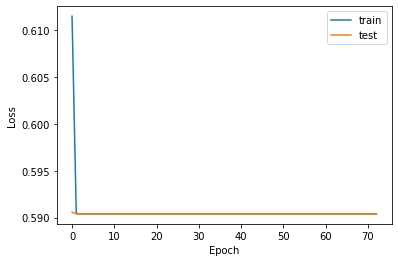

<Figure size 432x288 with 0 Axes>

In [ ]:
#plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()
pyplot.savefig('foo.png')

In [ ]:
#membuat prediksi training
xhat = model.predict(train_X)
xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

#invert scaling untuk peramalan
inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
inv_xhat = scaler.inverse_transform(inv_xhat)
inv_xhat = inv_xhat[:,0]

#invert scaling untuk aktual
train_y = train_y.reshape((len(train_y), 1))
inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_x = scaler.inverse_transform(inv_x)
inv_x = inv_x[:,0]

#================================================================#

#membuat prediksi testing
yhat = model.predict(test_X)
yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

#invert scaling untuk peramalan
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

#invert scaling untuk aktual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [ ]:
# calculate RMSE
np.seterr(divide='ignore', invalid='ignore')
def mean_absolute_percentage_error(yhat, test_y):
    yhat, test_y = np.array(yhat), np.array(test_y)
    return np.mean(np.abs((yhat, test_y) / test_y))

print('==============minmax===================')
print(f'MAPE test is : {(mean_absolute_percentage_error(test_y, yhat))}')
print(f'MAPE test invert is : {(mean_absolute_percentage_error(inv_y, inv_yhat))}')

print('==============zscore===================')
print(f'MAPE test is : {(mean_absolute_percentage_error(yhat, test_y))}')
print(f'MAPE test invert is : {(mean_absolute_percentage_error(inv_yhat, inv_y))}')

print('=======================================')
rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
print(f'RMSE Testing is : %.3f' % rmsetest)
rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

print(f'R2 test is : {r2_score(test_y, yhat)}')
print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')

==============minmax===================
MAPE test is : 4495084159.9677305
MAPE test invert is : 1.00000977607364
==============zscore===================
MAPE test is : 0.5000000001746175
MAPE test invert is : 1.284726255663866
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -3.4711811203180787e-10
R2 test invert is : -3.4711788998720294e-10


Actual : [[-0.36767572]
 [-0.46521548]
 [-0.46521548]
 ...
 [ 1.68065927]
 [ 3.14375569]
 [ 3.24129545]]
Predicted: [[6.567051e-11]
 [6.567051e-11]
 [6.567051e-11]
 ...
 [6.567064e-11]
 [6.567114e-11]
 [6.567139e-11]]


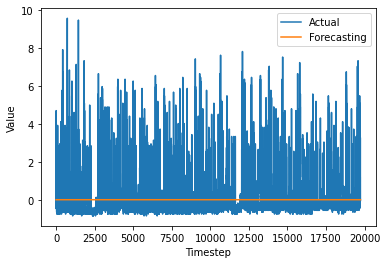

In [ ]:
print('Actual :', test_y)
print('Predicted:', yhat)
# plot history
pyplot.plot(test_y, label='Actual')
pyplot.plot(yhat, label='Forecasting')
pyplot.xlabel('Timestep')
pyplot.ylabel('Value')
pyplot.legend()
pyplot.show()

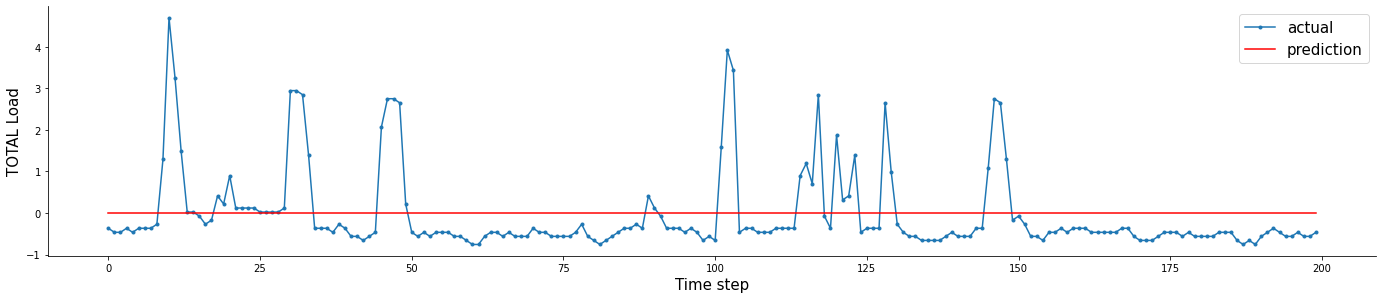

In [ ]:
idx = 200#int(len(yhat))
aa=[x for x in range(idx)]
pyplot.figure(figsize=(20,4))
pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
pyplot.tight_layout()
sns.despine(top=True)
pyplot.subplots_adjust(left=0.07)
pyplot.ylabel('TOTAL Load', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()

# 5 run grid

## tanh zscore

mkdir: cannot create directory ‘foto’: File exists
Epoch 1/50
198/198 [==============================] - 6s 9ms/step - loss: 0.7123 - val_loss: 0.6812
Epoch 2/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6814 - val_loss: 0.6810
Epoch 3/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6812 - val_loss: 0.6810
Epoch 4/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6810 - val_loss: 0.6813
Epoch 5/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6811 - val_loss: 0.6809
Epoch 6/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6810 - val_loss: 0.6805
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6808 - val_loss: 0.6806
Epoch 8/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6809 - val_loss: 0.6813
Epoch 9/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6810 - val_loss: 0.6809
Epoch 10/50
198/198 [===========================

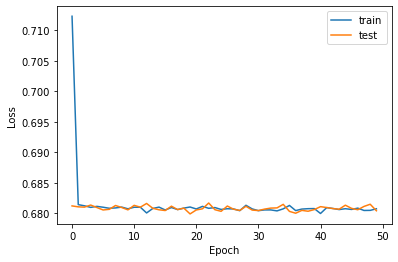

==============minmax===================
MAPE test is : 1.3751871067999597
MAPE test invert is : 0.7673745040408526
==============zscore===================
MAPE test is : 239.06648927727053
MAPE test invert is : 0.45904337391796135
RMSE Testing is : 0.825
RMSE Testing invert is : 84.567
R2 test is : 0.3196341931793577
R2 test invert is : 0.3196341931793577


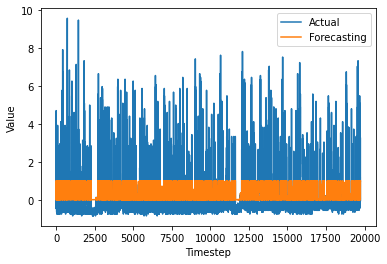

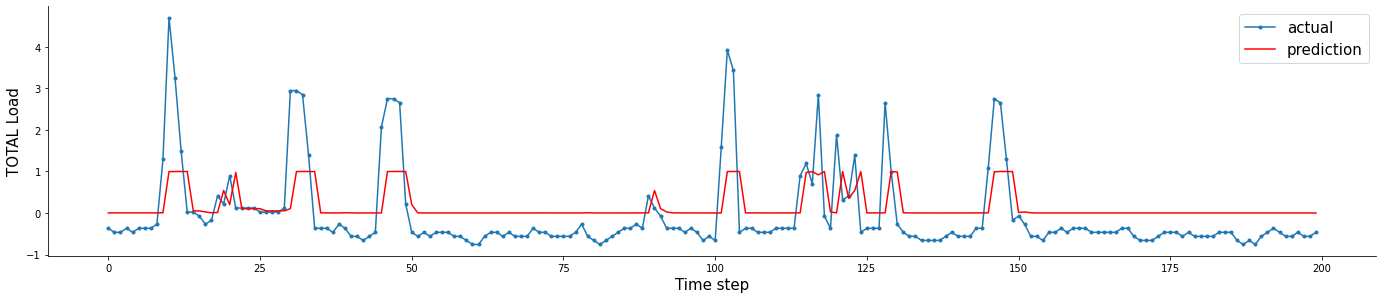

Epoch 1/50
198/198 [==============================] - 5s 11ms/step - loss: 0.7212 - val_loss: 0.6810
Epoch 2/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6815 - val_loss: 0.6809
Epoch 3/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6816 - val_loss: 0.6808
Epoch 4/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6809 - val_loss: 0.6807
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6813 - val_loss: 0.6807
Epoch 6/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6808 - val_loss: 0.6815
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6812 - val_loss: 0.6807
Epoch 8/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6810 - val_loss: 0.6807
Epoch 9/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6809 - val_loss: 0.6817
Epoch 10/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6807 - val_loss: 0.6

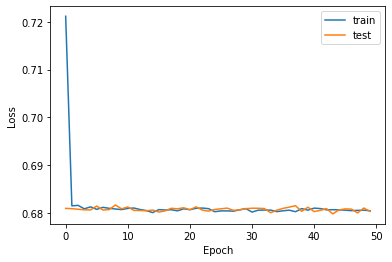

==============minmax===================
MAPE test is : 1.3669301368339197
MAPE test invert is : 0.7666127077858631
==============zscore===================
MAPE test is : 292.95638084434097
MAPE test invert is : 0.4589613404018751
RMSE Testing is : 0.825
RMSE Testing invert is : 84.565
R2 test is : 0.3196540934594462
R2 test invert is : 0.3196540934594464


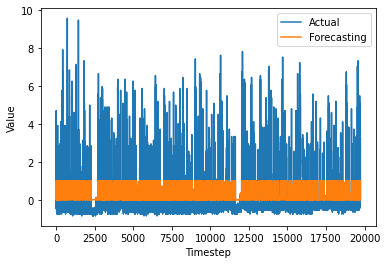

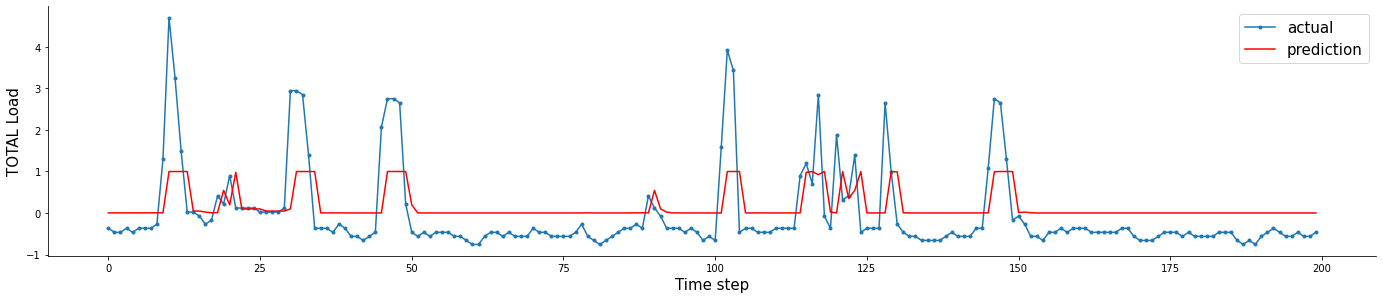

Epoch 1/50
198/198 [==============================] - 5s 11ms/step - loss: 0.7158 - val_loss: 0.6810
Epoch 2/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6811 - val_loss: 0.6805
Epoch 3/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6812 - val_loss: 0.6805
Epoch 4/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6810 - val_loss: 0.6813
Epoch 5/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6809 - val_loss: 0.6811
Epoch 6/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6805 - val_loss: 0.6809
Epoch 7/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6808 - val_loss: 0.6814
Epoch 8/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6813 - val_loss: 0.6806
Epoch 9/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6809 - val_loss: 0.6811
Epoch 10/50
198/198 [==============================] - 1s 6ms/step - loss: 0.6799 - val_loss: 0.6

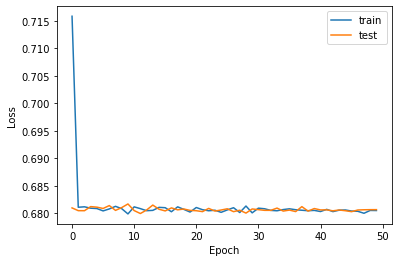

==============minmax===================
MAPE test is : 1.3648435059057111
MAPE test invert is : 0.7667876641113806
==============zscore===================
MAPE test is : 226.31478527003156
MAPE test invert is : 0.4591454862562732
RMSE Testing is : 0.825
RMSE Testing invert is : 84.585
R2 test is : 0.3193328757224194
R2 test invert is : 0.31933287572241953


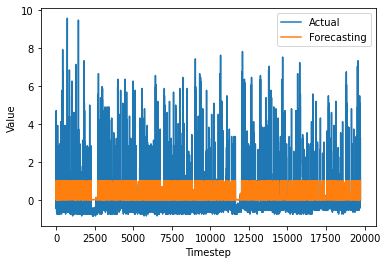

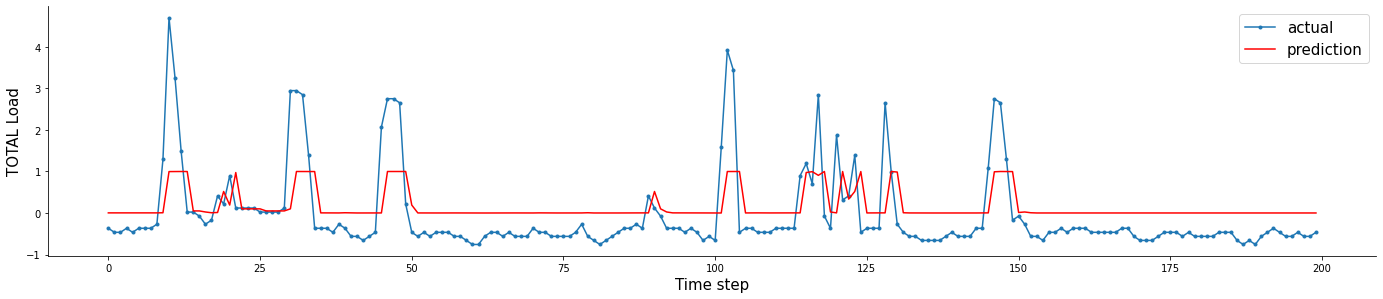

Epoch 1/50
198/198 [==============================] - 6s 12ms/step - loss: 0.7249 - val_loss: 0.6812
Epoch 2/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6813 - val_loss: 0.6813
Epoch 3/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6812 - val_loss: 0.6810
Epoch 4/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6810 - val_loss: 0.6816
Epoch 5/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6811 - val_loss: 0.6811
Epoch 6/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6806 - val_loss: 0.6803
Epoch 7/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6806 - val_loss: 0.6806
Epoch 8/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6810 - val_loss: 0.6814
Epoch 9/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6810 - val_loss: 0.6811
Epoch 10/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6804 - val_loss: 0.6

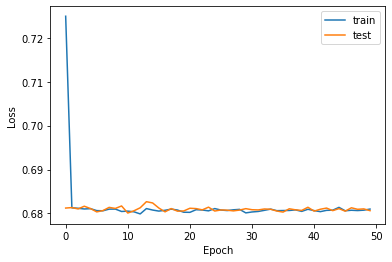

==============minmax===================
MAPE test is : 1.367582261138809
MAPE test invert is : 0.7669700413797692
==============zscore===================
MAPE test is : 223.611064097186
MAPE test invert is : 0.45912651292094636
RMSE Testing is : 0.825
RMSE Testing invert is : 84.581
R2 test is : 0.3194064762237864
R2 test invert is : 0.3194064762237866


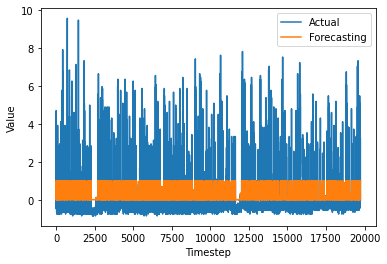

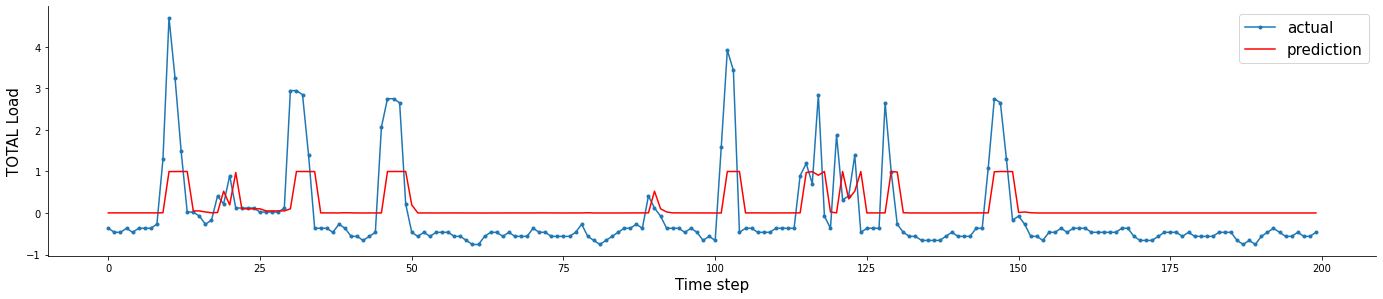

Epoch 1/50
198/198 [==============================] - 5s 10ms/step - loss: 0.7200 - val_loss: 0.6811
Epoch 2/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6812 - val_loss: 0.6806
Epoch 3/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6813 - val_loss: 0.6806
Epoch 4/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6815 - val_loss: 0.6809
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6813 - val_loss: 0.6807
Epoch 6/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6809 - val_loss: 0.6820
Epoch 7/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6811 - val_loss: 0.6807
Epoch 8/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6809 - val_loss: 0.6805
Epoch 9/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6809 - val_loss: 0.6804
Epoch 10/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6805 - val_loss: 0.68

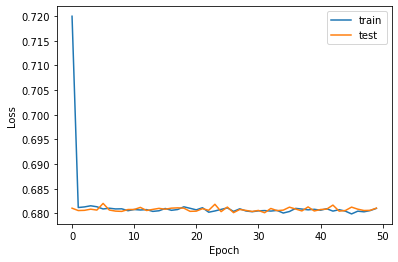

==============minmax===================
MAPE test is : 1.3453824953742226
MAPE test invert is : 0.7653348977815007
==============zscore===================
MAPE test is : 260.99152375600346
MAPE test invert is : 0.45923011165484373
RMSE Testing is : 0.825
RMSE Testing invert is : 84.608
R2 test is : 0.3189612257933667
R2 test invert is : 0.31896122579336694


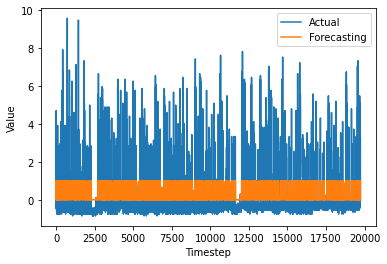

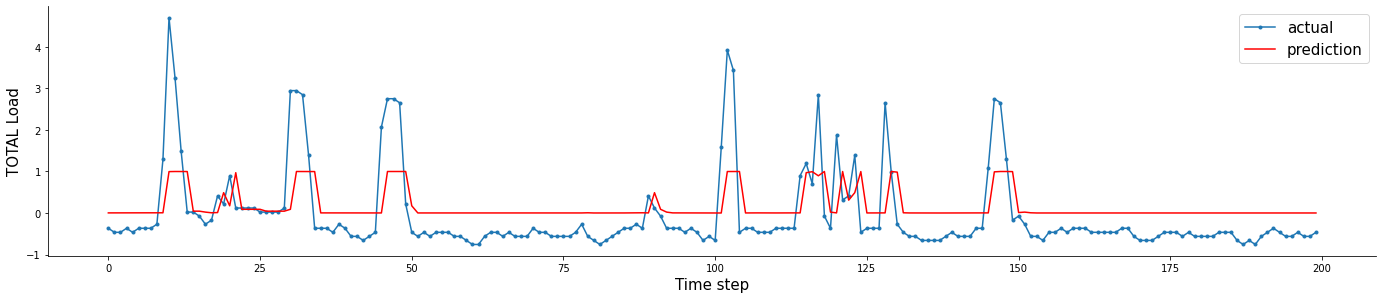

In [21]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto
import shutil

for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.show()
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto")

## tanh minmax

Epoch 1/50
198/198 [==============================] - 8s 13ms/step - loss: 0.0190 - val_loss: 0.0049
Epoch 2/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 3/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 4/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0054 - val_loss: 0.0049
Epoch 5/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 6/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 7/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 8/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 9/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 10/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0051 - val_loss: 0.

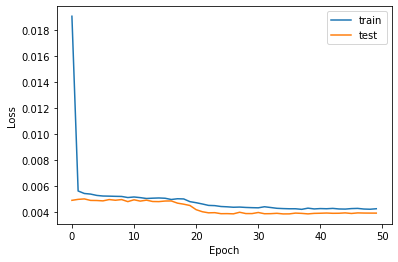

==============minmax===================
MAPE test is : 93898007347.96443
MAPE test invert is : 0.4020812674755112
==============zscore===================
MAPE test is : 0.3504244238209232
MAPE test invert is : 0.30911673451947463
RMSE Testing is : 0.063
RMSE Testing invert is : 67.271
R2 test is : 0.569471364123693
R2 test invert is : 0.569471364123693


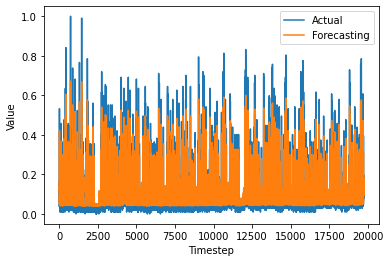

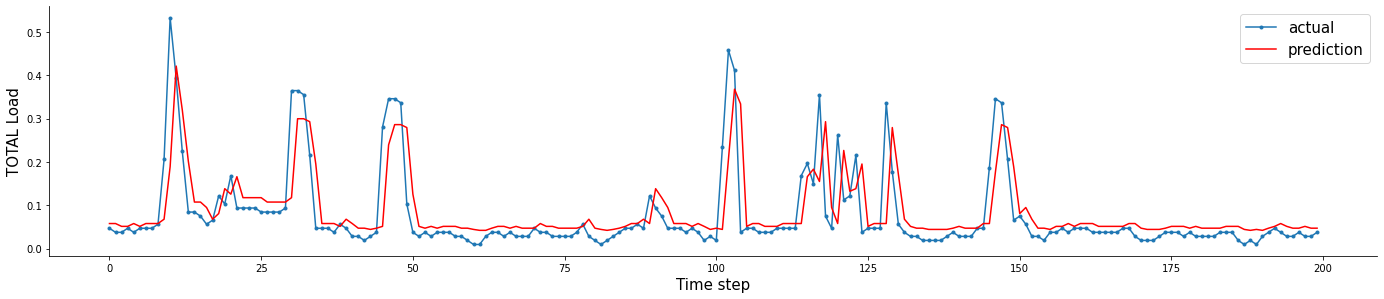

Epoch 1/50
198/198 [==============================] - 7s 15ms/step - loss: 0.0191 - val_loss: 0.0050
Epoch 2/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 3/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0056 - val_loss: 0.0049
Epoch 4/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 6/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0053 - val_loss: 0.0051
Epoch 7/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 8/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 9/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 10/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0051 - val_loss: 0.00

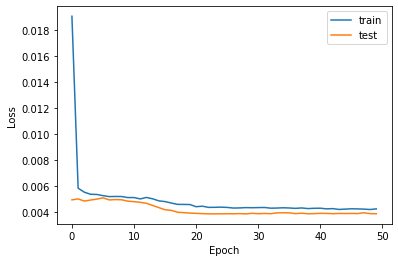

==============minmax===================
MAPE test is : 90346705836.7059
MAPE test invert is : 0.355580516716428
==============zscore===================
MAPE test is : 0.3302923147406162
MAPE test invert is : 0.2898331795948753
RMSE Testing is : 0.062
RMSE Testing invert is : 66.782
R2 test is : 0.57571416065079
R2 test invert is : 0.57571416065079


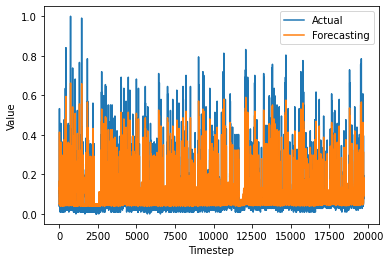

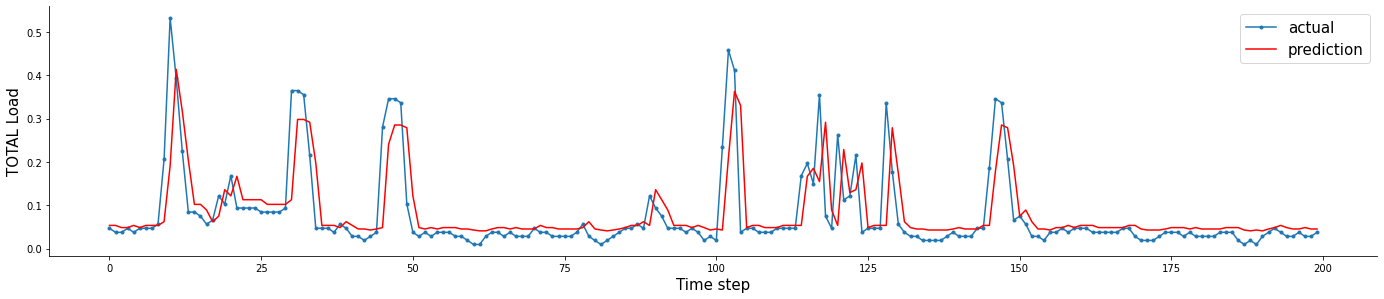

Epoch 1/50
198/198 [==============================] - 10s 14ms/step - loss: 0.0200 - val_loss: 0.0052
Epoch 2/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0059 - val_loss: 0.0049
Epoch 3/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 4/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 5/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 6/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 8/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 9/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 10/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0051 - val_loss: 

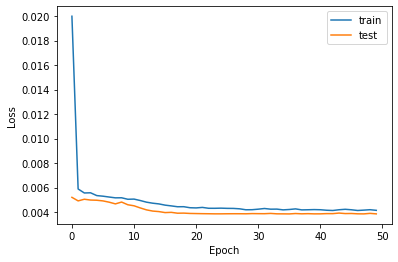

==============minmax===================
MAPE test is : 87285676677.31407
MAPE test invert is : 0.33009831207083196
==============zscore===================
MAPE test is : 0.320686188573918
MAPE test invert is : 0.28061701439734454
RMSE Testing is : 0.062
RMSE Testing invert is : 66.496
R2 test is : 0.5793382732843998
R2 test invert is : 0.5793382732843999


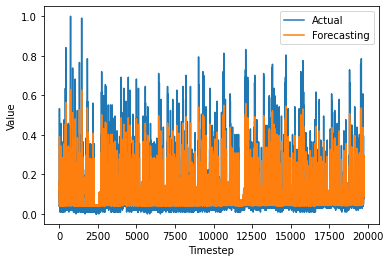

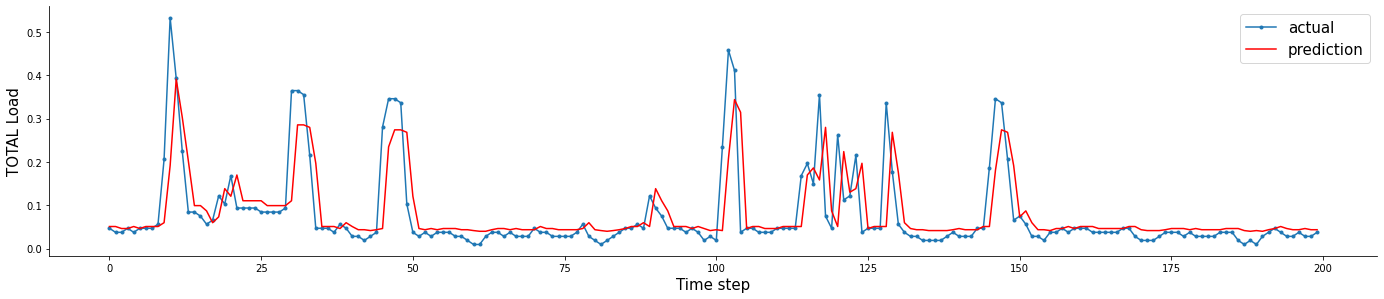

Epoch 1/50
198/198 [==============================] - 6s 12ms/step - loss: 0.0200 - val_loss: 0.0050
Epoch 2/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0058 - val_loss: 0.0051
Epoch 3/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0055 - val_loss: 0.0049
Epoch 4/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 6/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0052 - val_loss: 0.0049
Epoch 8/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0052 - val_loss: 0.0047
Epoch 9/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0051 - val_loss: 0.0047
Epoch 10/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0051 - val_loss: 

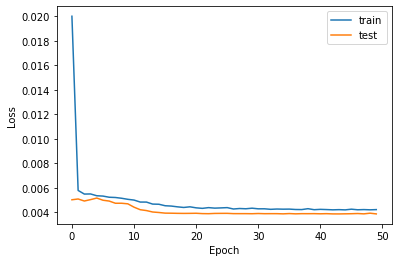

==============minmax===================
MAPE test is : 86068114477.35106
MAPE test invert is : 0.3230779486560018
==============zscore===================
MAPE test is : 0.3178683053897635
MAPE test invert is : 0.2777988315793427
RMSE Testing is : 0.062
RMSE Testing invert is : 66.486
R2 test is : 0.5794687473415765
R2 test invert is : 0.5794687473415765


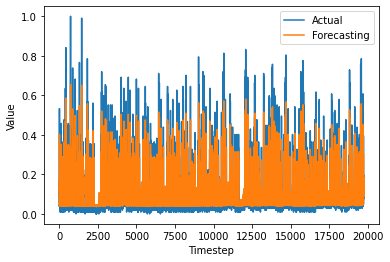

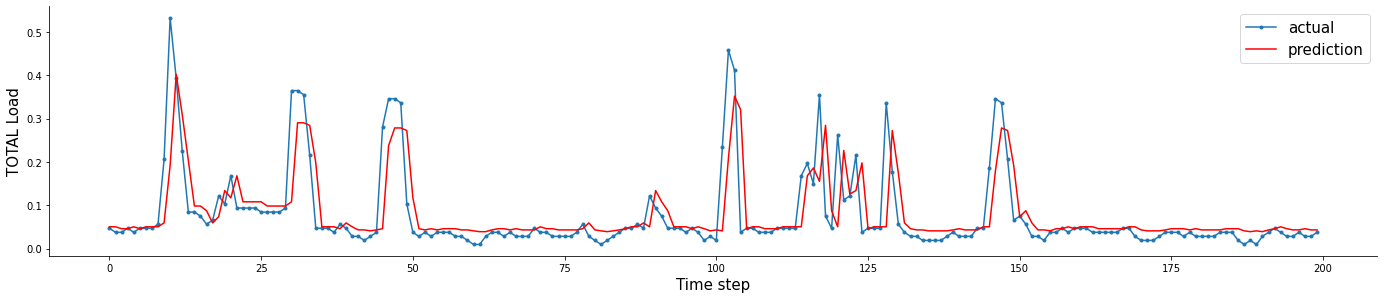

Epoch 1/50
198/198 [==============================] - 7s 12ms/step - loss: 0.0207 - val_loss: 0.0050
Epoch 2/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0059 - val_loss: 0.0051
Epoch 3/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0056 - val_loss: 0.0050
Epoch 4/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 6/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 7/50
198/198 [==============================] - 1s 8ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 8/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 9/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0052 - val_loss: 0.0048
Epoch 10/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0051 - val_loss: 0.00

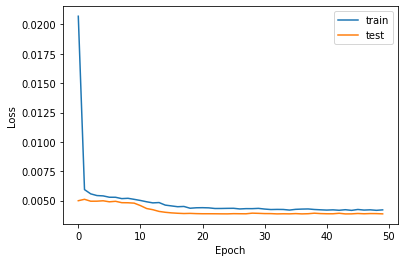

==============minmax===================
MAPE test is : 86296683853.8637
MAPE test invert is : 0.32594449536202275
==============zscore===================
MAPE test is : 0.31896006655789605
MAPE test invert is : 0.278836108913555
RMSE Testing is : 0.062
RMSE Testing invert is : 66.599
R2 test is : 0.578028976517249
R2 test invert is : 0.578028976517249


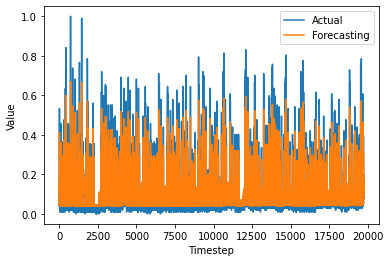

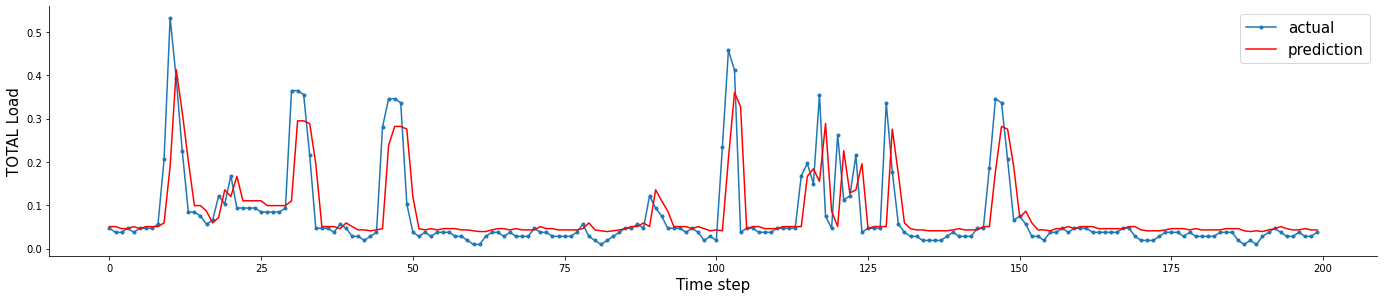

In [42]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto2") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto2")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto2")

## sig zscore

Epoch 1/50
198/198 [==============================] - 7s 10ms/step - loss: 1.0123 - val_loss: 0.9986
Epoch 2/50
198/198 [==============================] - 1s 7ms/step - loss: 0.9964 - val_loss: 0.9896
Epoch 3/50
198/198 [==============================] - 2s 8ms/step - loss: 0.9637 - val_loss: 0.9031
Epoch 4/50
198/198 [==============================] - 1s 7ms/step - loss: 0.8465 - val_loss: 0.7591
Epoch 5/50
198/198 [==============================] - 2s 11ms/step - loss: 0.7434 - val_loss: 0.7036
Epoch 6/50
198/198 [==============================] - 2s 8ms/step - loss: 0.7089 - val_loss: 0.6929
Epoch 7/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6969 - val_loss: 0.6907
Epoch 8/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6947 - val_loss: 0.6896
Epoch 9/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6913 - val_loss: 0.6867
Epoch 10/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6913 - val_loss: 0.68

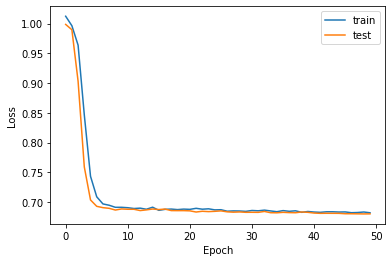

==============minmax===================
MAPE test is : 1.3406999080396695
MAPE test invert is : 0.7619057952772144
==============zscore===================
MAPE test is : 1802.63573525357
MAPE test invert is : 0.4582955128938994
RMSE Testing is : 0.825
RMSE Testing invert is : 84.559
R2 test is : 0.3197611693107678
R2 test invert is : 0.31976116931076803


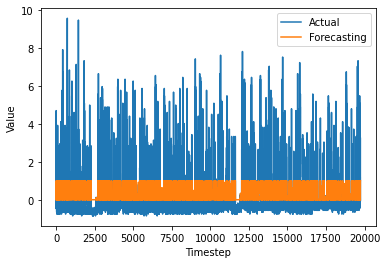

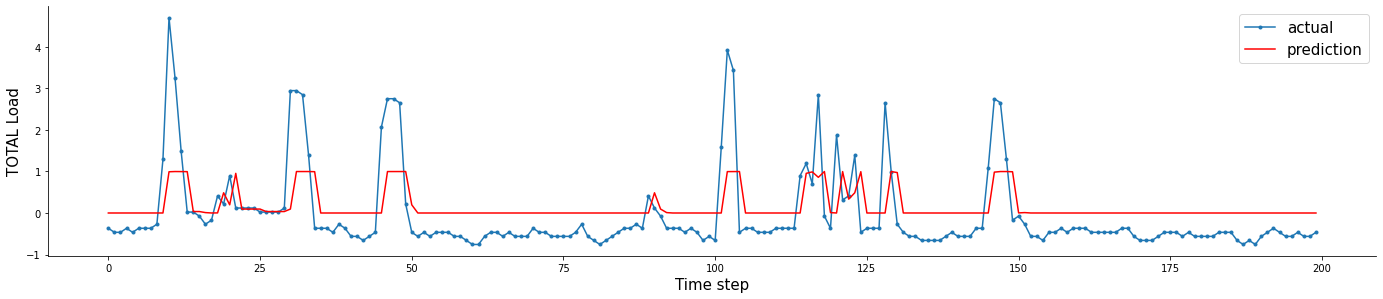

Epoch 1/50
198/198 [==============================] - 6s 12ms/step - loss: 1.0331 - val_loss: 0.9999
Epoch 2/50
198/198 [==============================] - 2s 9ms/step - loss: 0.9993 - val_loss: 0.9957
Epoch 3/50
198/198 [==============================] - 1s 7ms/step - loss: 0.9855 - val_loss: 0.9583
Epoch 4/50
198/198 [==============================] - 1s 6ms/step - loss: 0.9153 - val_loss: 0.8281
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.7909 - val_loss: 0.7241
Epoch 6/50
198/198 [==============================] - 1s 7ms/step - loss: 0.7249 - val_loss: 0.7000
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.7001 - val_loss: 0.6921
Epoch 8/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6950 - val_loss: 0.6892
Epoch 9/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6928 - val_loss: 0.6876
Epoch 10/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6903 - val_loss: 0.69

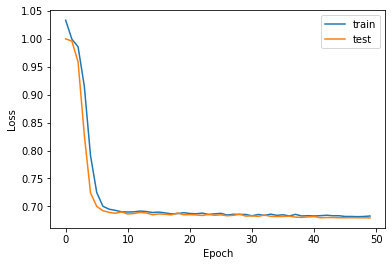

==============minmax===================
MAPE test is : 1.3690774264880634
MAPE test invert is : 0.7627487097839724
==============zscore===================
MAPE test is : 2560.487431319342
MAPE test invert is : 0.4578695489202942
RMSE Testing is : 0.824
RMSE Testing invert is : 84.501
R2 test is : 0.3206874048673728
R2 test invert is : 0.320687404867373


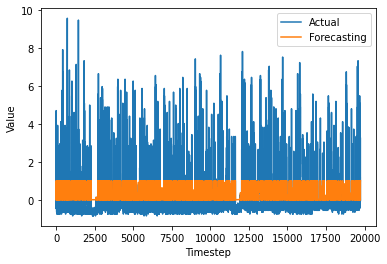

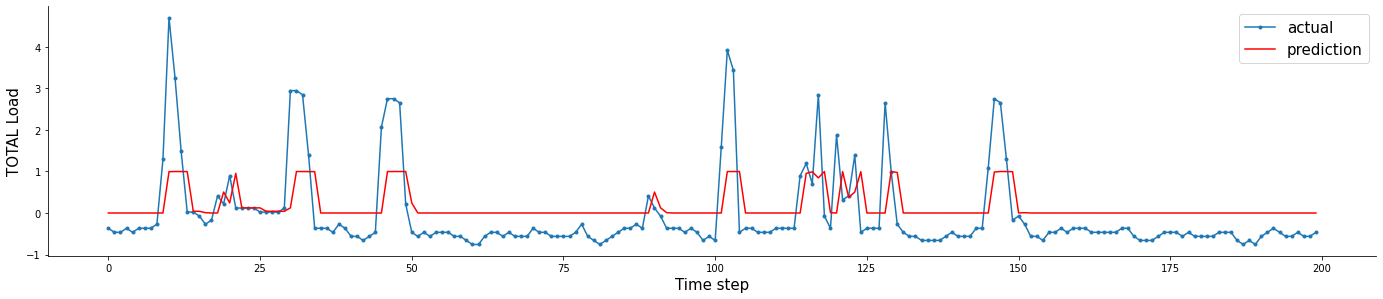

Epoch 1/50
198/198 [==============================] - 5s 11ms/step - loss: 1.0082 - val_loss: 0.9959
Epoch 2/50
198/198 [==============================] - 1s 7ms/step - loss: 0.9872 - val_loss: 0.9581
Epoch 3/50
198/198 [==============================] - 2s 8ms/step - loss: 0.8998 - val_loss: 0.8043
Epoch 4/50
198/198 [==============================] - 2s 8ms/step - loss: 0.7705 - val_loss: 0.7133
Epoch 5/50
198/198 [==============================] - 2s 10ms/step - loss: 0.7141 - val_loss: 0.6955
Epoch 6/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6994 - val_loss: 0.6927
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6965 - val_loss: 0.6887
Epoch 8/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6931 - val_loss: 0.6857
Epoch 9/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6894 - val_loss: 0.6860
Epoch 10/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6898 - val_loss: 0.69

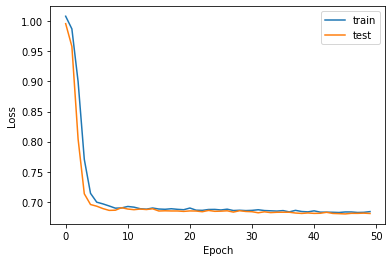

==============minmax===================
MAPE test is : 1.3297354348805948
MAPE test invert is : 0.7613621276675242
==============zscore===================
MAPE test is : 1723.1047572914374
MAPE test invert is : 0.4584689772282135
RMSE Testing is : 0.825
RMSE Testing invert is : 84.579
R2 test is : 0.319434590583093
R2 test invert is : 0.3194345905830931


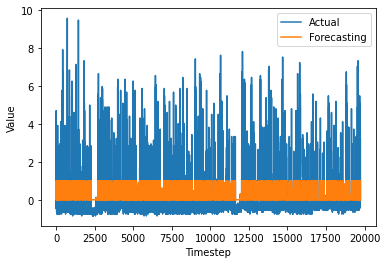

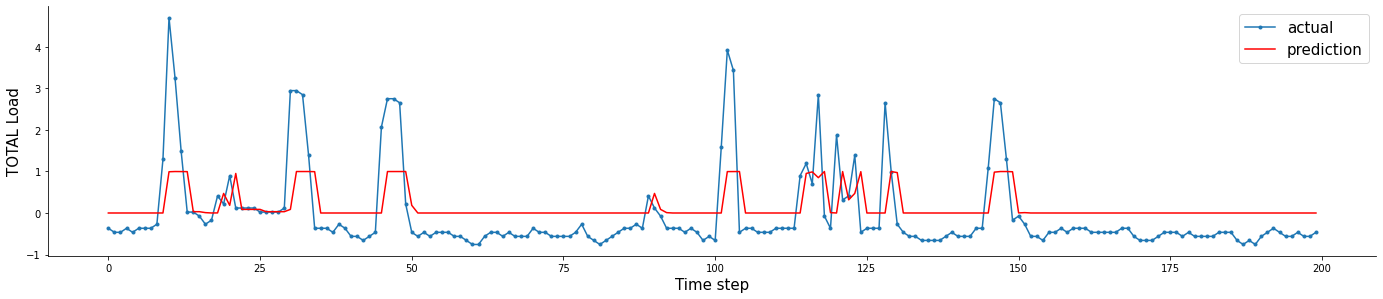

Epoch 1/50
198/198 [==============================] - 7s 15ms/step - loss: 1.0444 - val_loss: 0.9987
Epoch 2/50
198/198 [==============================] - 2s 9ms/step - loss: 0.9969 - val_loss: 0.9903
Epoch 3/50
198/198 [==============================] - 2s 9ms/step - loss: 0.9720 - val_loss: 0.9272
Epoch 4/50
198/198 [==============================] - 2s 9ms/step - loss: 0.8793 - val_loss: 0.7898
Epoch 5/50
198/198 [==============================] - 2s 8ms/step - loss: 0.7633 - val_loss: 0.7119
Epoch 6/50
198/198 [==============================] - 1s 7ms/step - loss: 0.7154 - val_loss: 0.6953
Epoch 7/50
198/198 [==============================] - 2s 11ms/step - loss: 0.6971 - val_loss: 0.6917
Epoch 8/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6935 - val_loss: 0.6899
Epoch 9/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6910 - val_loss: 0.6895
Epoch 10/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6913 - val_loss: 0.6

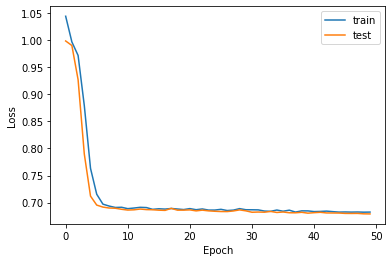

==============minmax===================
MAPE test is : 1.386261298609639
MAPE test invert is : 0.7638230472249032
==============zscore===================
MAPE test is : 1978.0631132785054
MAPE test invert is : 0.4579670866399788
RMSE Testing is : 0.824
RMSE Testing invert is : 84.482
R2 test is : 0.3209963881105732
R2 test invert is : 0.3209963881105733


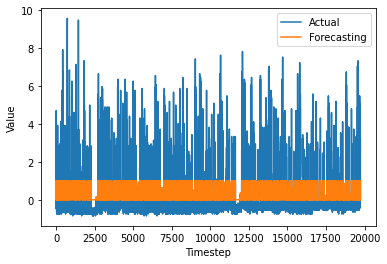

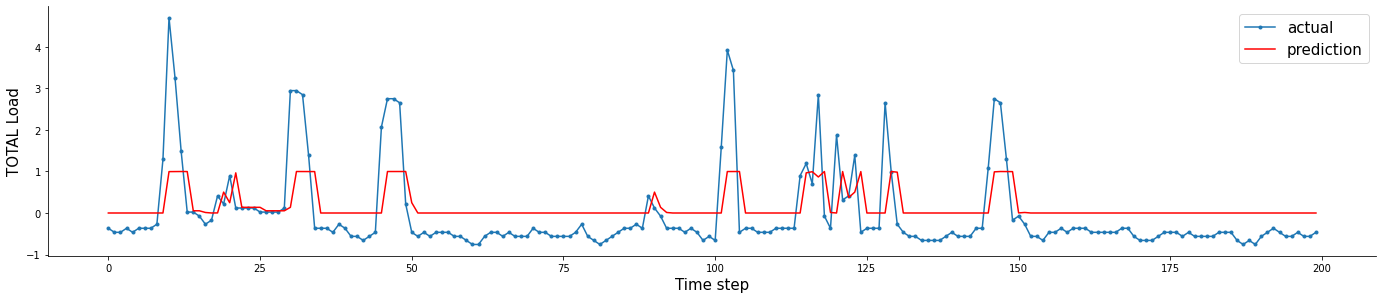

Epoch 1/50
198/198 [==============================] - 6s 14ms/step - loss: 1.0160 - val_loss: 0.9982
Epoch 2/50
198/198 [==============================] - 1s 7ms/step - loss: 0.9962 - val_loss: 0.9874
Epoch 3/50
198/198 [==============================] - 2s 9ms/step - loss: 0.9617 - val_loss: 0.8987
Epoch 4/50
198/198 [==============================] - 2s 9ms/step - loss: 0.8427 - val_loss: 0.7595
Epoch 5/50
198/198 [==============================] - 2s 9ms/step - loss: 0.7426 - val_loss: 0.7031
Epoch 6/50
198/198 [==============================] - 2s 9ms/step - loss: 0.7075 - val_loss: 0.6943
Epoch 7/50
198/198 [==============================] - 2s 8ms/step - loss: 0.6977 - val_loss: 0.6903
Epoch 8/50
198/198 [==============================] - 2s 10ms/step - loss: 0.6942 - val_loss: 0.6892
Epoch 9/50
198/198 [==============================] - 1s 7ms/step - loss: 0.6944 - val_loss: 0.6899
Epoch 10/50
198/198 [==============================] - 2s 9ms/step - loss: 0.6898 - val_loss: 0.68

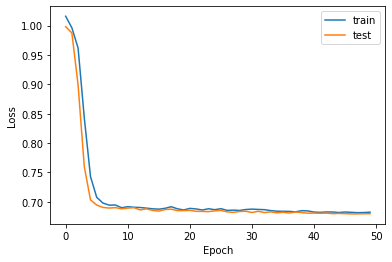

==============minmax===================
MAPE test is : 1.3614975303431576
MAPE test invert is : 0.7620824906524778
==============zscore===================
MAPE test is : 3653.032609381487
MAPE test invert is : 0.4578026626812863
RMSE Testing is : 0.824
RMSE Testing invert is : 84.515
R2 test is : 0.3204725985945872
R2 test invert is : 0.3204725985945873


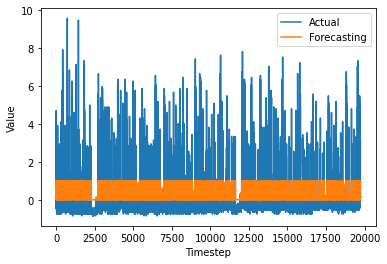

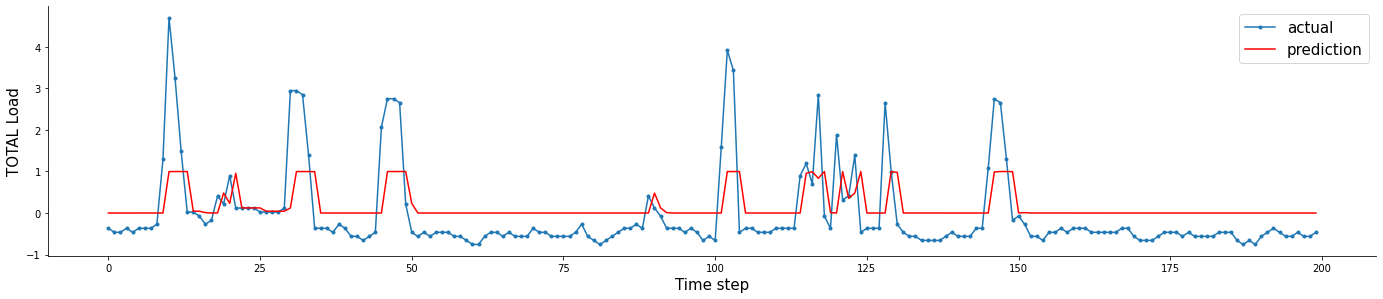

In [22]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto4
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')




  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto4") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto4")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto4")

## sig minmax

Epoch 1/50
198/198 [==============================] - 11s 21ms/step - loss: 0.0424 - val_loss: 0.0094
Epoch 2/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0104 - val_loss: 0.0093
Epoch 3/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 6/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 7/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 8/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 10/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0097 - val_loss: 0.

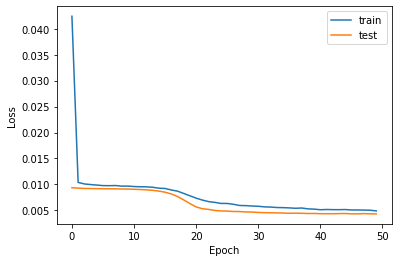

==============minmax===================
MAPE test is : 109006289934.96724
MAPE test invert is : 0.41401921553956267
==============zscore===================
MAPE test is : 0.38939682040307316
MAPE test invert is : 0.34247838617471854
RMSE Testing is : 0.066
RMSE Testing invert is : 70.190
R2 test is : 0.5312981535398567
R2 test invert is : 0.5312981535398565


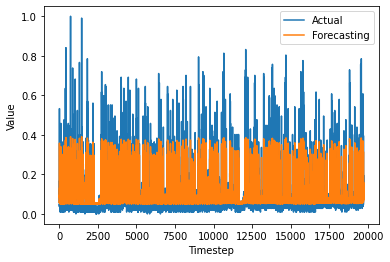

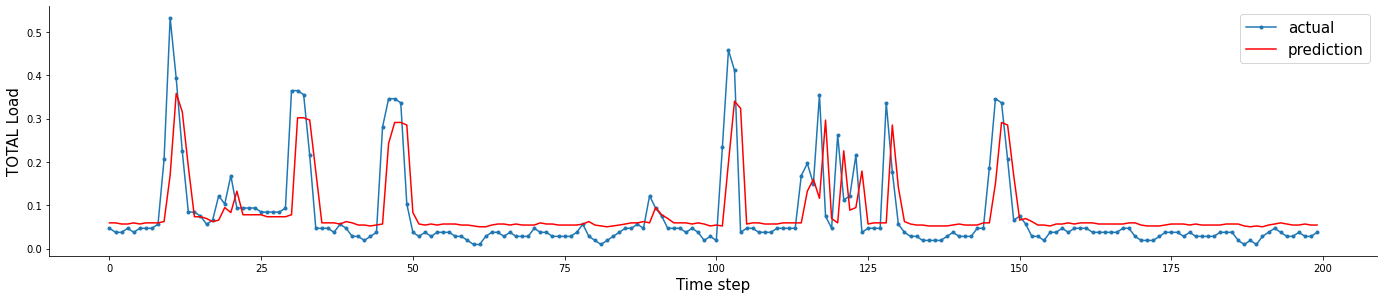

Epoch 1/50
198/198 [==============================] - 6s 11ms/step - loss: 0.0197 - val_loss: 0.0093
Epoch 2/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 1s 8ms/step - loss: 0.0097 - val_loss: 0.0092
Epoch 6/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 1s 8ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 10/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0095 - val_loss: 0.00

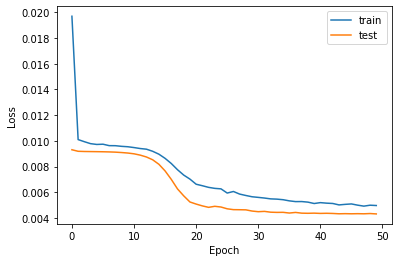

==============minmax===================
MAPE test is : 111385631409.4572
MAPE test invert is : 0.430462014593668
==============zscore===================
MAPE test is : 0.39133389770083854
MAPE test invert is : 0.34490015958123615
RMSE Testing is : 0.066
RMSE Testing invert is : 70.286
R2 test is : 0.530017767811489
R2 test invert is : 0.530017767811489


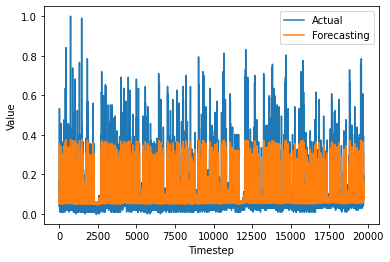

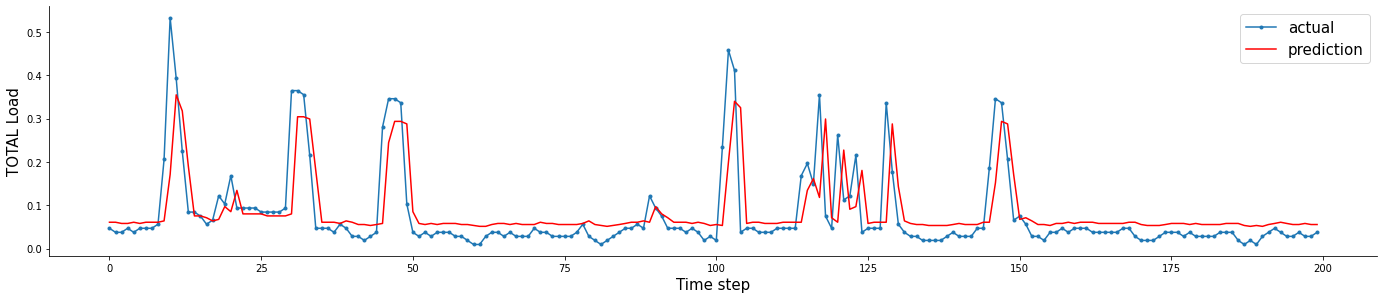

Epoch 1/50
198/198 [==============================] - 7s 12ms/step - loss: 0.0128 - val_loss: 0.0092
Epoch 2/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0100 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 5/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 6/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0096 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 9/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0096 - val_loss: 0.0090
Epoch 10/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0095 - val_loss: 0.00

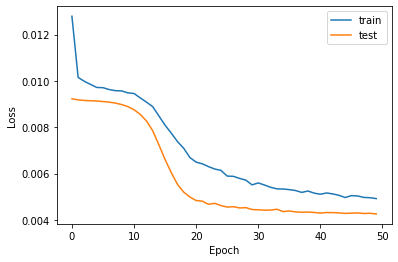

==============minmax===================
MAPE test is : 106085265597.40448
MAPE test invert is : 0.40124906301877755
==============zscore===================
MAPE test is : 0.38145555837785966
MAPE test invert is : 0.3351633736046585
RMSE Testing is : 0.065
RMSE Testing invert is : 69.836
R2 test is : 0.5360163556331986
R2 test invert is : 0.5360163556331987


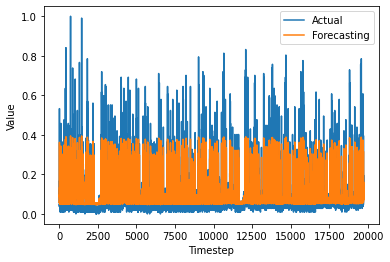

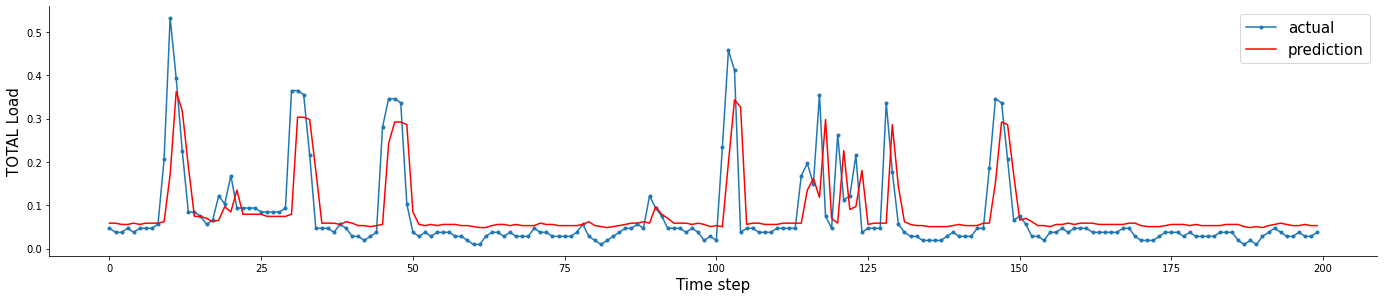

Epoch 1/50
198/198 [==============================] - 10s 13ms/step - loss: 0.0169 - val_loss: 0.0094
Epoch 2/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0103 - val_loss: 0.0092
Epoch 3/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 12ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 6/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 7/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 2s 8ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 10/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0097 - val_loss: 0.0

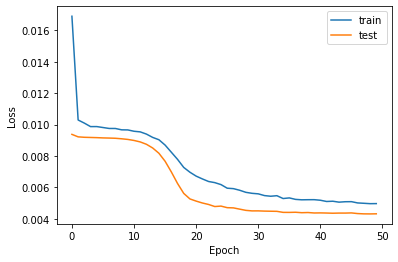

==============minmax===================
MAPE test is : 111512424620.00877
MAPE test invert is : 0.43044108928367897
==============zscore===================
MAPE test is : 0.3928714708960246
MAPE test invert is : 0.3462310209838992
RMSE Testing is : 0.066
RMSE Testing invert is : 70.275
R2 test is : 0.5301593217016584
R2 test invert is : 0.5301593217016585


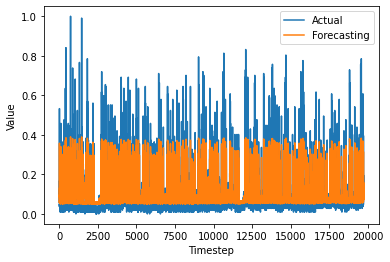

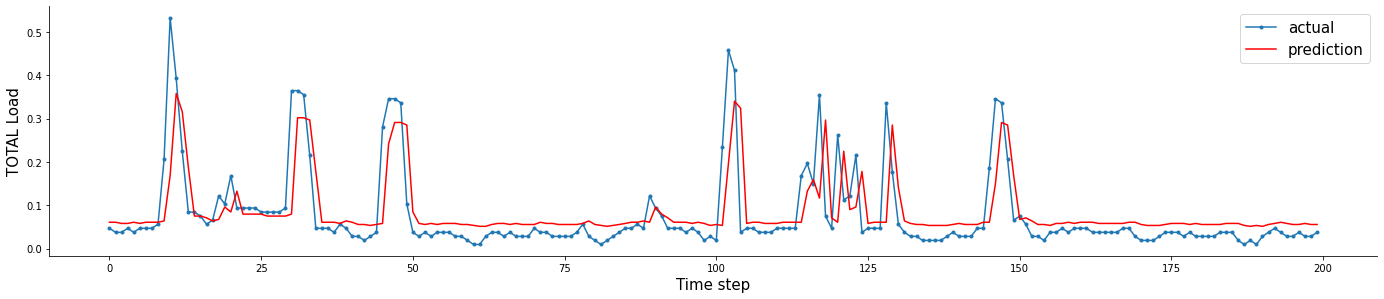

Epoch 1/50
198/198 [==============================] - 6s 12ms/step - loss: 0.0310 - val_loss: 0.0094
Epoch 2/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0103 - val_loss: 0.0093
Epoch 3/50
198/198 [==============================] - 2s 11ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 4/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0099 - val_loss: 0.0092
Epoch 5/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 6/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0098 - val_loss: 0.0092
Epoch 7/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 8/50
198/198 [==============================] - 2s 9ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 9/50
198/198 [==============================] - 1s 7ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 10/50
198/198 [==============================] - 2s 10ms/step - loss: 0.0096 - val_loss: 0.

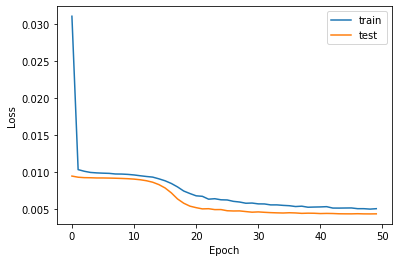

==============minmax===================
MAPE test is : 105152490985.42009
MAPE test invert is : 0.3913918074384865
==============zscore===================
MAPE test is : 0.3860627316708227
MAPE test invert is : 0.3386031754099616
RMSE Testing is : 0.066
RMSE Testing invert is : 70.203
R2 test is : 0.5311318199909851
R2 test invert is : 0.5311318199909851


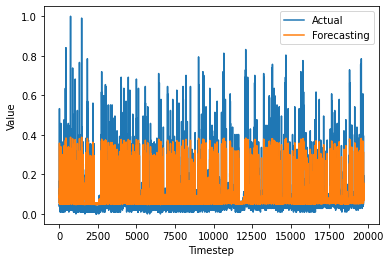

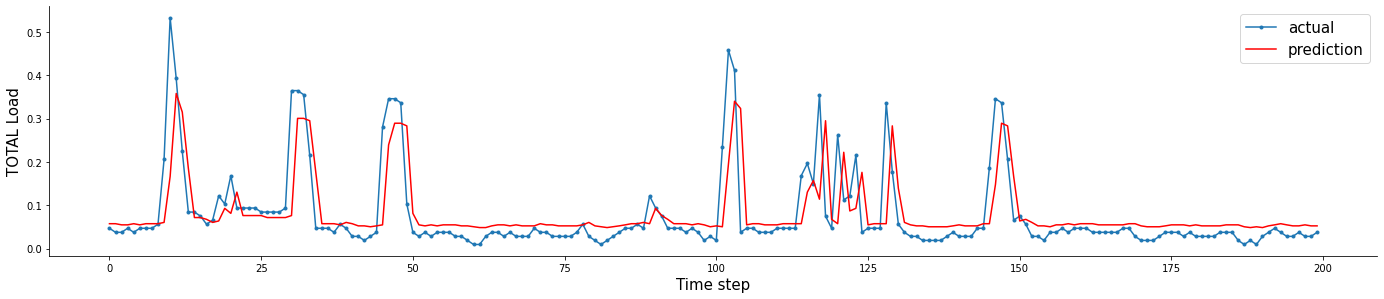

In [43]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto3
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(32, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 32, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mse', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=50, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto3") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto3")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto3")

# 5 run random

## tanh zscore

Epoch 1/73
198/198 [==============================] - 14s 19ms/step - loss: 0.5351 - val_loss: 0.5277
Epoch 2/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5289 - val_loss: 0.5264
Epoch 3/73
198/198 [==============================] - 3s 17ms/step - loss: 0.5280 - val_loss: 0.5282
Epoch 4/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5289 - val_loss: 0.5272
Epoch 5/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5272 - val_loss: 0.5267
Epoch 6/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5268 - val_loss: 0.5232
Epoch 7/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5249 - val_loss: 0.5233
Epoch 8/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5250 - val_loss: 0.5238
Epoch 9/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5249 - val_loss: 0.5238
Epoch 10/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5252 - val_l

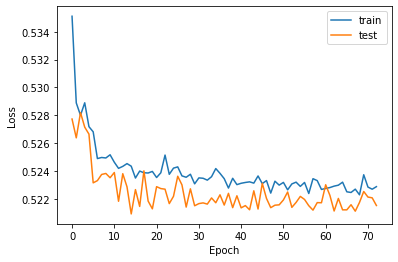

==============minmax===================
MAPE test is : 1.2250740760034549
MAPE test invert is : 0.7539066916065569
==============zscore===================
MAPE test is : 1175.9162552310531
MAPE test invert is : 0.4636604663698725
RMSE Testing is : 0.831
RMSE Testing invert is : 85.197
R2 test is : 0.3094521156068537
R2 test invert is : 0.3094521156068538


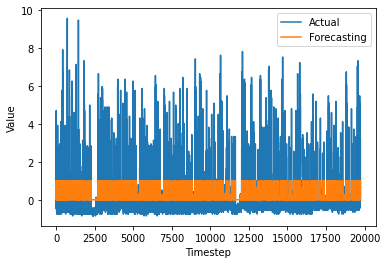

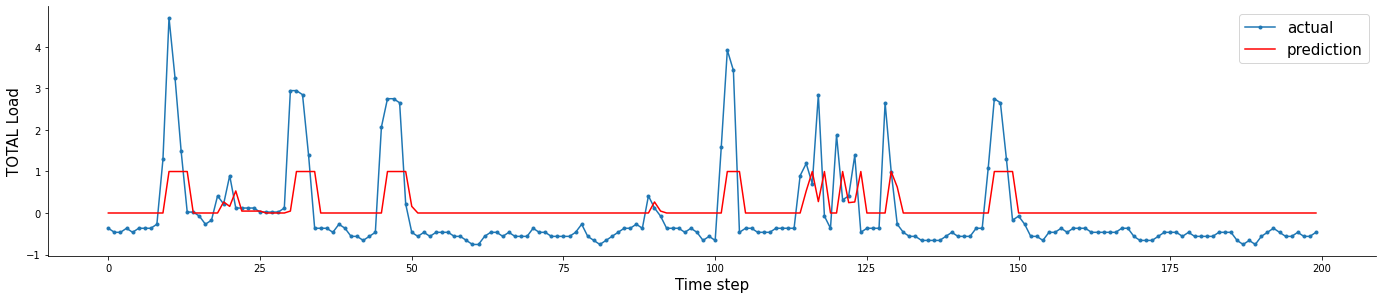

Epoch 1/73
198/198 [==============================] - 14s 24ms/step - loss: 0.5332 - val_loss: 0.5283
Epoch 2/73
198/198 [==============================] - 3s 18ms/step - loss: 0.5286 - val_loss: 0.5284
Epoch 3/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5285 - val_loss: 0.5268
Epoch 4/73
198/198 [==============================] - 3s 17ms/step - loss: 0.5280 - val_loss: 0.5280
Epoch 5/73
198/198 [==============================] - 4s 18ms/step - loss: 0.5281 - val_loss: 0.5272
Epoch 6/73
198/198 [==============================] - 3s 18ms/step - loss: 0.5282 - val_loss: 0.5276
Epoch 7/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5282 - val_loss: 0.5252
Epoch 8/73
198/198 [==============================] - 4s 18ms/step - loss: 0.5277 - val_loss: 0.5253
Epoch 9/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5276 - val_loss: 0.5262
Epoch 10/73
198/198 [==============================] - 3s 18ms/step - loss: 0.5270 - val_l

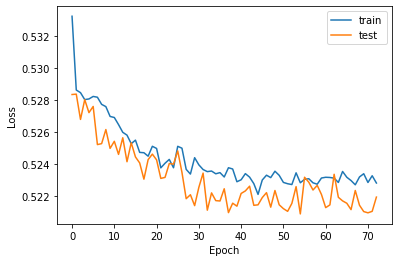

==============minmax===================
MAPE test is : 1.1940157922259969
MAPE test invert is : 0.752917801124232
==============zscore===================
MAPE test is : 1346.2076215921077
MAPE test invert is : 0.4661281061005305
RMSE Testing is : 0.833
RMSE Testing invert is : 85.419
R2 test is : 0.3058555344631294
R2 test invert is : 0.3058555344631294


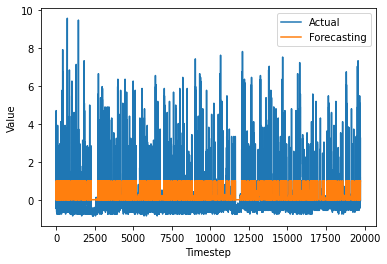

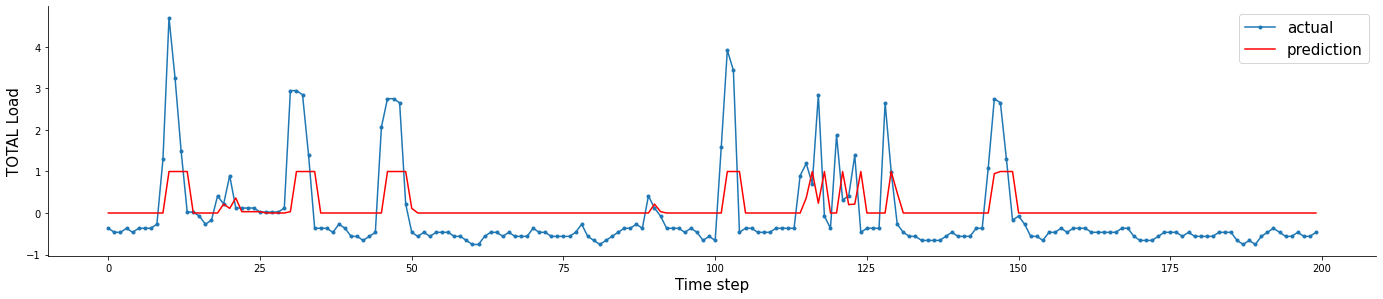

Epoch 1/73
198/198 [==============================] - 13s 20ms/step - loss: 0.5362 - val_loss: 0.5283
Epoch 2/73
198/198 [==============================] - 3s 17ms/step - loss: 0.5292 - val_loss: 0.5275
Epoch 3/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5280 - val_loss: 0.5261
Epoch 4/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5284 - val_loss: 0.5263
Epoch 5/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5278 - val_loss: 0.5272
Epoch 6/73
198/198 [==============================] - 3s 17ms/step - loss: 0.5277 - val_loss: 0.5257
Epoch 7/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5274 - val_loss: 0.5269
Epoch 8/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5271 - val_loss: 0.5252
Epoch 9/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5269 - val_loss: 0.5250
Epoch 10/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5258 - val_l

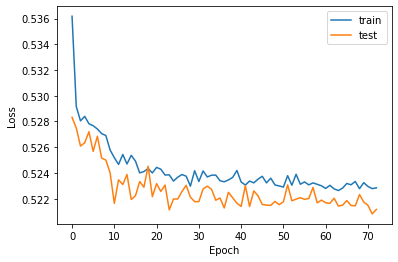

==============minmax===================
MAPE test is : 1.1920469837879777
MAPE test invert is : 0.7520423665652777
==============zscore===================
MAPE test is : 1439.7268338772567
MAPE test invert is : 0.4655875737316611
RMSE Testing is : 0.833
RMSE Testing invert is : 85.398
R2 test is : 0.30619044308226306
R2 test invert is : 0.3061904430822632


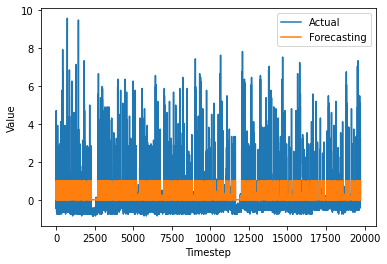

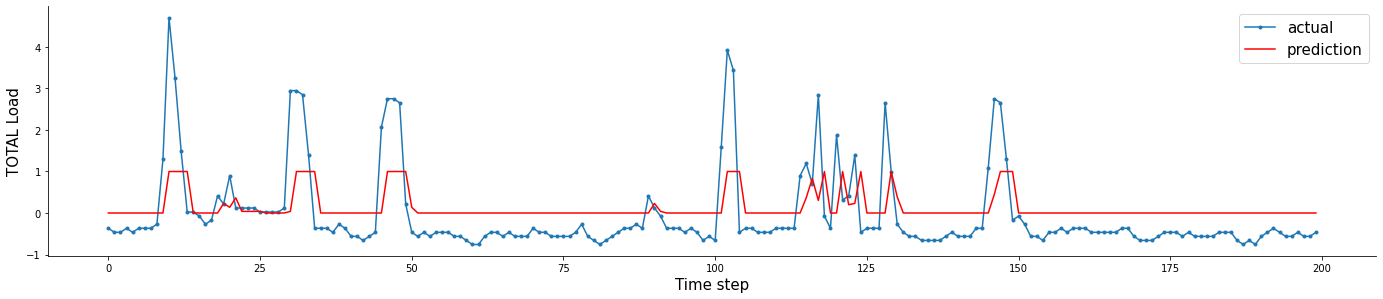

Epoch 1/73
198/198 [==============================] - 15s 26ms/step - loss: 0.5359 - val_loss: 0.5280
Epoch 2/73
198/198 [==============================] - 3s 17ms/step - loss: 0.5284 - val_loss: 0.5288
Epoch 3/73
198/198 [==============================] - 4s 20ms/step - loss: 0.5285 - val_loss: 0.5272
Epoch 4/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5278 - val_loss: 0.5277
Epoch 5/73
198/198 [==============================] - 4s 20ms/step - loss: 0.5281 - val_loss: 0.5257
Epoch 6/73
198/198 [==============================] - 4s 20ms/step - loss: 0.5280 - val_loss: 0.5257
Epoch 7/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5274 - val_loss: 0.5265
Epoch 8/73
198/198 [==============================] - 4s 22ms/step - loss: 0.5275 - val_loss: 0.5255
Epoch 9/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5271 - val_loss: 0.5257
Epoch 10/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5277 - val_l

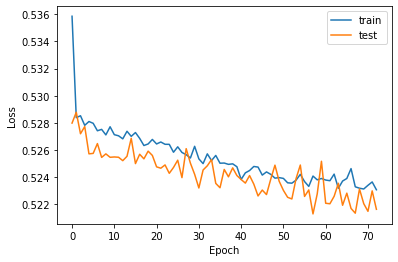

==============minmax===================
MAPE test is : 1.1819032851317062
MAPE test invert is : 0.7521301187999043
==============zscore===================
MAPE test is : 1371.4915313173808
MAPE test invert is : 0.4666343411736315
RMSE Testing is : 0.834
RMSE Testing invert is : 85.486
R2 test is : 0.3047566193211353
R2 test invert is : 0.3047566193211354


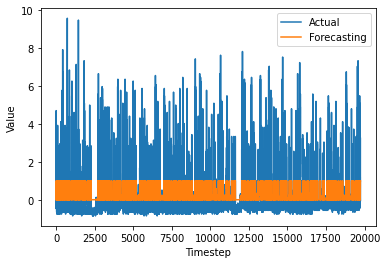

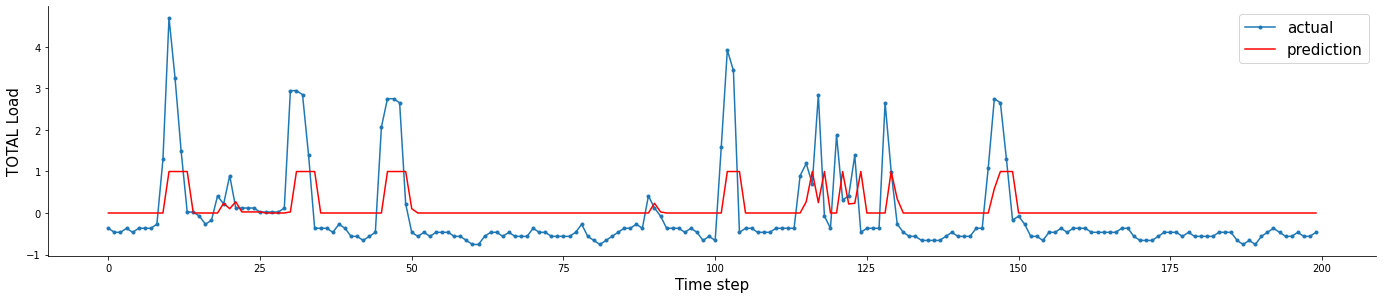

Epoch 1/73
198/198 [==============================] - 14s 24ms/step - loss: 0.5351 - val_loss: 0.5280
Epoch 2/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5284 - val_loss: 0.5276
Epoch 3/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5279 - val_loss: 0.5271
Epoch 4/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5280 - val_loss: 0.5273
Epoch 5/73
198/198 [==============================] - 4s 18ms/step - loss: 0.5279 - val_loss: 0.5271
Epoch 6/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5283 - val_loss: 0.5255
Epoch 7/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5278 - val_loss: 0.5270
Epoch 8/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5275 - val_loss: 0.5254
Epoch 9/73
198/198 [==============================] - 4s 18ms/step - loss: 0.5272 - val_loss: 0.5268
Epoch 10/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5270 - val_l

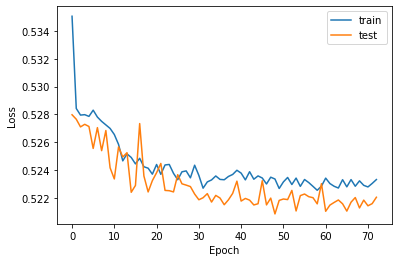

==============minmax===================
MAPE test is : 1.1850497039351853
MAPE test invert is : 0.7522506764417063
==============zscore===================
MAPE test is : 1189.4342984617963
MAPE test invert is : 0.467425275347426
RMSE Testing is : 0.835
RMSE Testing invert is : 85.557
R2 test is : 0.30361171435967593
R2 test invert is : 0.30361171435967615


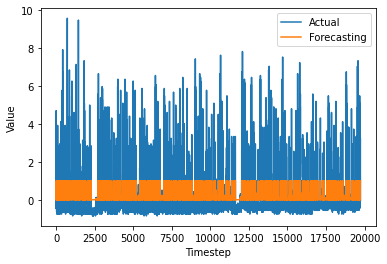

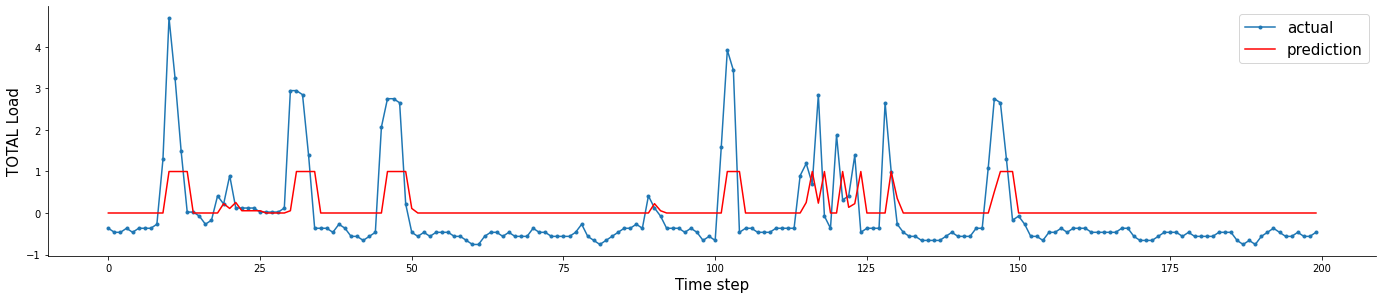

In [23]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto5
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(53, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mae', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=73, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto5") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto5")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto5")

## tanh minmax

Epoch 1/73
198/198 [==============================] - 16s 21ms/step - loss: 0.0532 - val_loss: 0.0313
Epoch 2/73
198/198 [==============================] - 4s 20ms/step - loss: 0.0385 - val_loss: 0.0311
Epoch 3/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0367 - val_loss: 0.0345
Epoch 4/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0352 - val_loss: 0.0289
Epoch 5/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0339 - val_loss: 0.0306
Epoch 6/73
198/198 [==============================] - 4s 18ms/step - loss: 0.0334 - val_loss: 0.0312
Epoch 7/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0330 - val_loss: 0.0274
Epoch 8/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0326 - val_loss: 0.0268
Epoch 9/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0325 - val_loss: 0.0268
Epoch 10/73
198/198 [==============================] - 3s 17ms/step - loss: 0.0319 - val_l

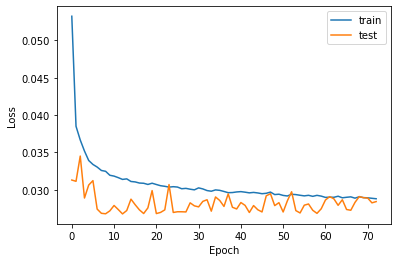

==============minmax===================
MAPE test is : 86255598633.39084
MAPE test invert is : 0.30983232473693684
==============zscore===================
MAPE test is : 0.31023128657578536
MAPE test invert is : 0.27027793998201505
RMSE Testing is : 0.064
RMSE Testing invert is : 68.173
R2 test is : 0.557848433309869
R2 test invert is : 0.557848433309869


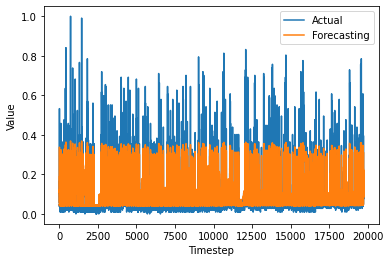

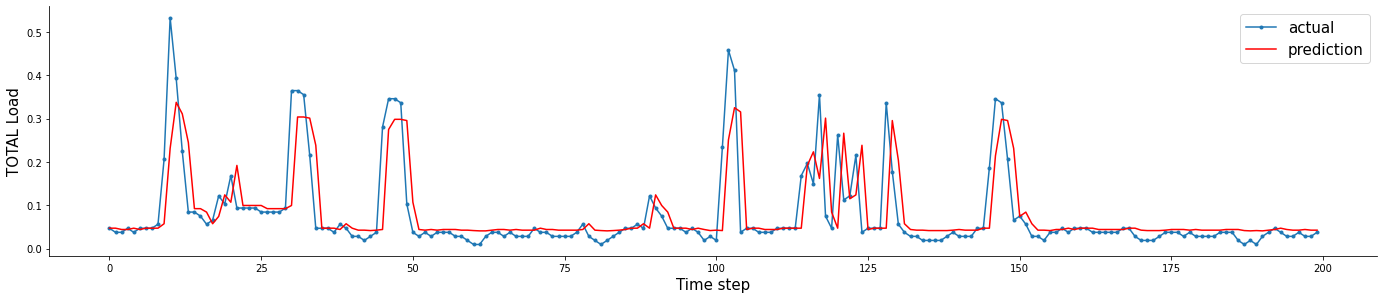

Epoch 1/73
198/198 [==============================] - 15s 28ms/step - loss: 0.0534 - val_loss: 0.0462
Epoch 2/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0383 - val_loss: 0.0299
Epoch 3/73
198/198 [==============================] - 4s 20ms/step - loss: 0.0362 - val_loss: 0.0315
Epoch 4/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0351 - val_loss: 0.0275
Epoch 5/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0343 - val_loss: 0.0267
Epoch 6/73
198/198 [==============================] - 4s 18ms/step - loss: 0.0336 - val_loss: 0.0321
Epoch 7/73
198/198 [==============================] - 4s 21ms/step - loss: 0.0329 - val_loss: 0.0298
Epoch 8/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0324 - val_loss: 0.0267
Epoch 9/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0322 - val_loss: 0.0296
Epoch 10/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0319 - val_l

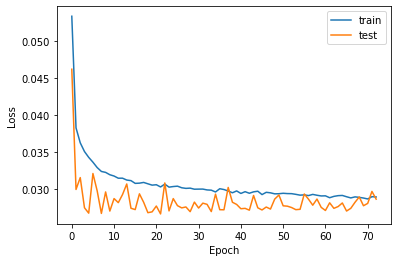

==============minmax===================
MAPE test is : 89197770900.80435
MAPE test invert is : 0.309769774870827
==============zscore===================
MAPE test is : 0.3194261004231133
MAPE test invert is : 0.277265490555651
RMSE Testing is : 0.065
RMSE Testing invert is : 69.283
R2 test is : 0.5433290559536131
R2 test invert is : 0.5433290559536132


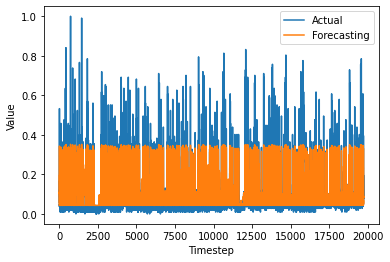

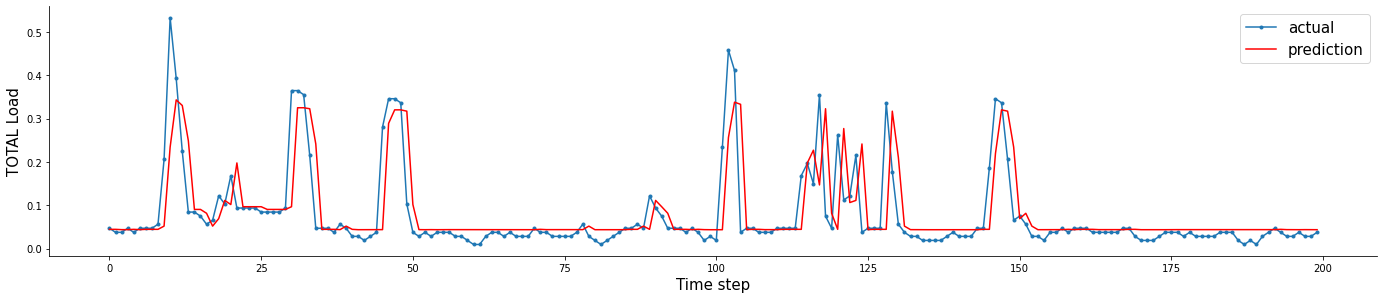

Epoch 1/73
198/198 [==============================] - 13s 22ms/step - loss: 0.0536 - val_loss: 0.0305
Epoch 2/73
198/198 [==============================] - 3s 17ms/step - loss: 0.0393 - val_loss: 0.0299
Epoch 3/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0363 - val_loss: 0.0353
Epoch 4/73
198/198 [==============================] - 4s 20ms/step - loss: 0.0350 - val_loss: 0.0290
Epoch 5/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0343 - val_loss: 0.0300
Epoch 6/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0335 - val_loss: 0.0299
Epoch 7/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0329 - val_loss: 0.0269
Epoch 8/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0324 - val_loss: 0.0295
Epoch 9/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0321 - val_loss: 0.0269
Epoch 10/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0319 - val_l

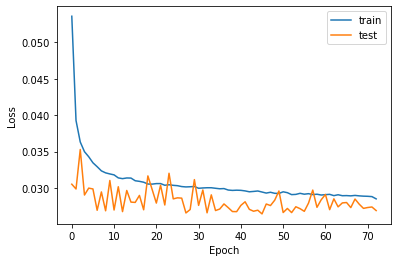

==============minmax===================
MAPE test is : 83067747357.72343
MAPE test invert is : 0.27471697488122876
==============zscore===================
MAPE test is : 0.3211205193205101
MAPE test invert is : 0.2778778607174518
RMSE Testing is : 0.064
RMSE Testing invert is : 68.685
R2 test is : 0.5511901053066464
R2 test invert is : 0.5511901053066466


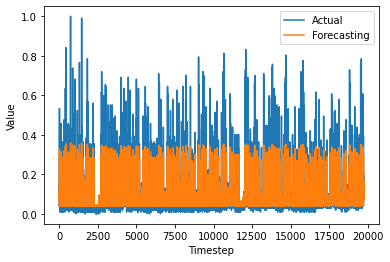

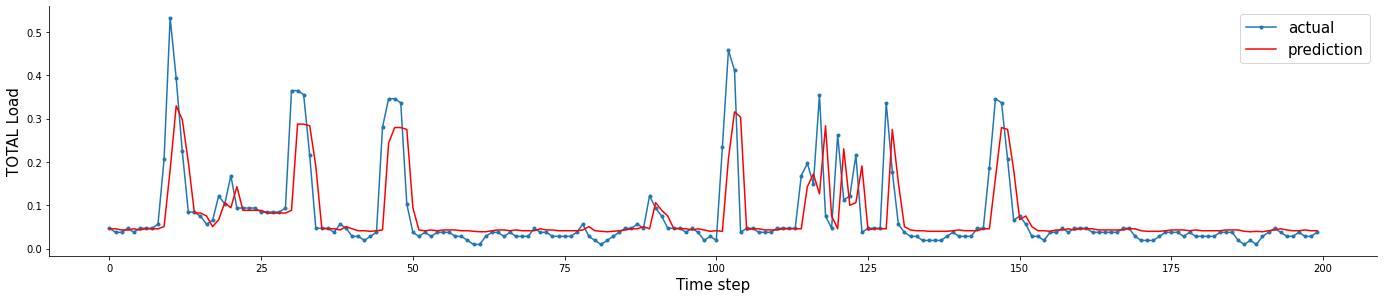

Epoch 1/73
198/198 [==============================] - 19s 30ms/step - loss: 0.0539 - val_loss: 0.0321
Epoch 2/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0399 - val_loss: 0.0305
Epoch 3/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0364 - val_loss: 0.0310
Epoch 4/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0350 - val_loss: 0.0270
Epoch 5/73
198/198 [==============================] - 4s 22ms/step - loss: 0.0341 - val_loss: 0.0275
Epoch 6/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0337 - val_loss: 0.0311
Epoch 7/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0329 - val_loss: 0.0303
Epoch 8/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0327 - val_loss: 0.0279
Epoch 9/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0323 - val_loss: 0.0270
Epoch 10/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0321 - val_l

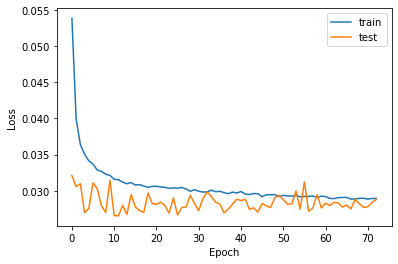

==============minmax===================
MAPE test is : 89288755033.7438
MAPE test invert is : 0.32252712269420214
==============zscore===================
MAPE test is : 0.3129995052703366
MAPE test invert is : 0.27322890672353567
RMSE Testing is : 0.063
RMSE Testing invert is : 67.787
R2 test is : 0.5628427017935308
R2 test invert is : 0.5628427017935309


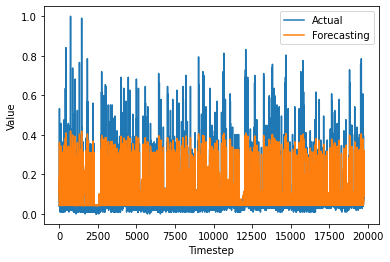

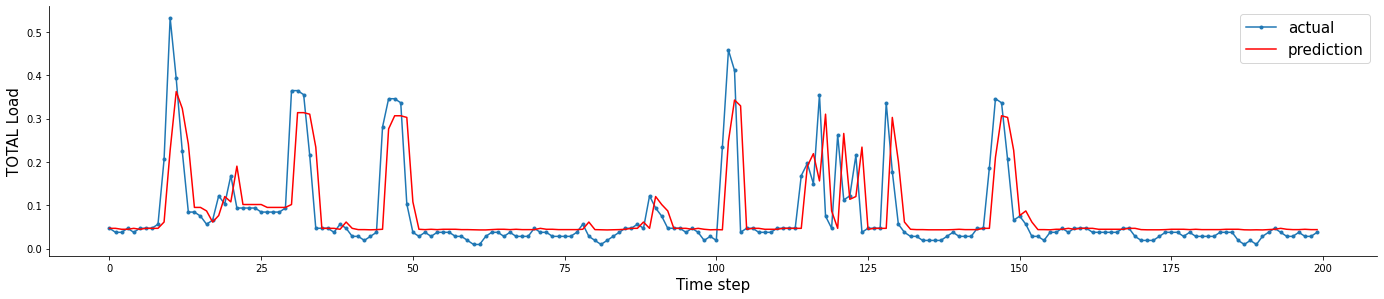

Epoch 1/73
198/198 [==============================] - 14s 22ms/step - loss: 0.0531 - val_loss: 0.0296
Epoch 2/73
198/198 [==============================] - 5s 25ms/step - loss: 0.0391 - val_loss: 0.0304
Epoch 3/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0365 - val_loss: 0.0274
Epoch 4/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0351 - val_loss: 0.0286
Epoch 5/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0341 - val_loss: 0.0277
Epoch 6/73
198/198 [==============================] - 4s 18ms/step - loss: 0.0331 - val_loss: 0.0272
Epoch 7/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0325 - val_loss: 0.0271
Epoch 8/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0324 - val_loss: 0.0270
Epoch 9/73
198/198 [==============================] - 3s 18ms/step - loss: 0.0321 - val_loss: 0.0285
Epoch 10/73
198/198 [==============================] - 4s 18ms/step - loss: 0.0320 - val_l

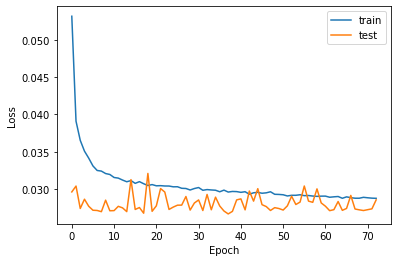

==============minmax===================
MAPE test is : 84979128290.2531
MAPE test invert is : 0.27105961720310867
==============zscore===================
MAPE test is : 0.35540090021321546
MAPE test invert is : 0.30792970349584003
RMSE Testing is : 0.068
RMSE Testing invert is : 72.568
R2 test is : 0.4990022522715788
R2 test invert is : 0.4990022522715789


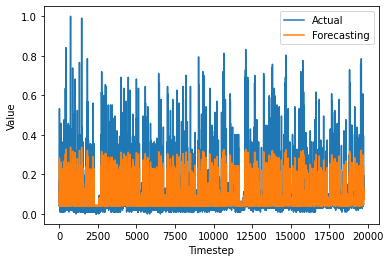

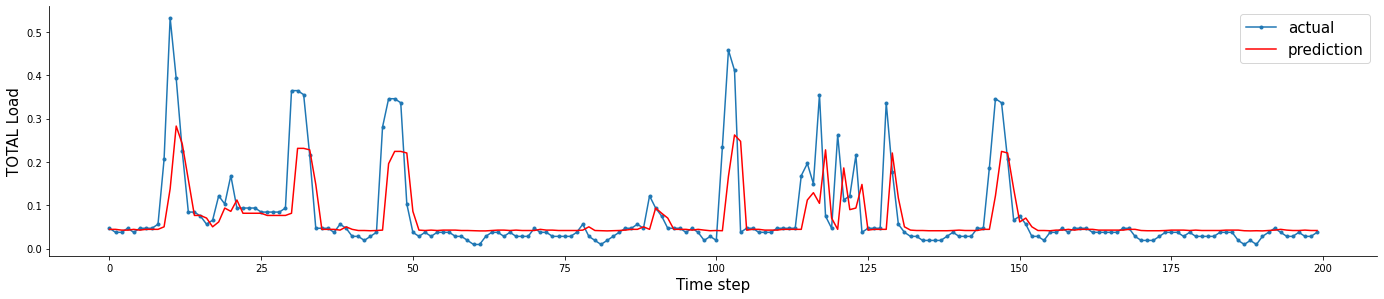

In [44]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto6
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(53, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mae', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=73, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))

  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto6") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')


  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto6")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto6")

## sig zscore

Epoch 1/73
198/198 [==============================] - 15s 34ms/step - loss: 0.6219 - val_loss: 0.5907
Epoch 2/73
198/198 [==============================] - 3s 17ms/step - loss: 0.5905 - val_loss: 0.5904
Epoch 3/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 4/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 5/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 6/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 7/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 8/73
198/198 [==============================] - 4s 18ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 9/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 10/73
198/198 [==============================] - 4s 18ms/step - loss: 0.5904 - val_l

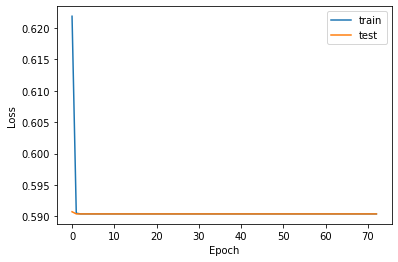

==============minmax===================
MAPE test is : 0.9999999999819168
MAPE test invert is : 0.7636200820377043
==============zscore===================
MAPE test is : 9047317945.294893
MAPE test invert is : 0.6195642029872664
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -3.471185561210177e-10
R2 test invert is : -3.4711811203180787e-10


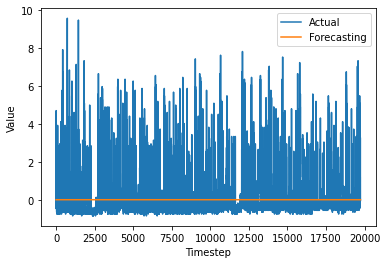

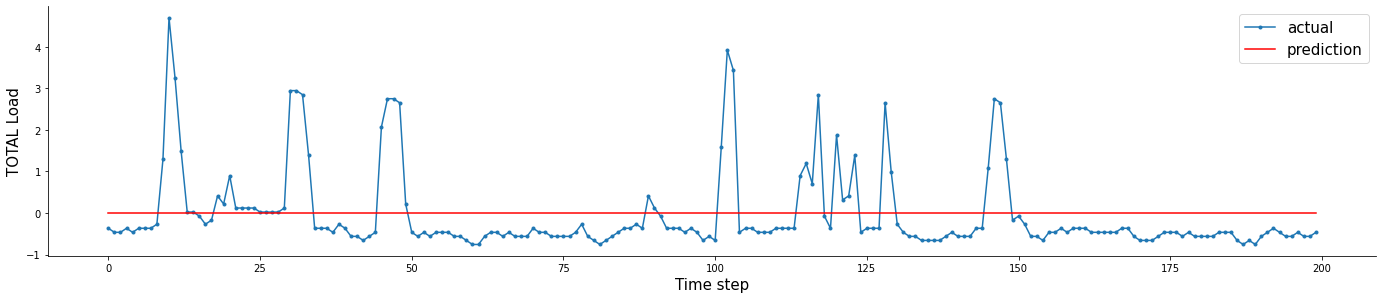

Epoch 1/73
198/198 [==============================] - 13s 21ms/step - loss: 0.6013 - val_loss: 0.5905
Epoch 2/73
198/198 [==============================] - 4s 18ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 3/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 4/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 5/73
198/198 [==============================] - 3s 18ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 6/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 7/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 8/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 9/73
198/198 [==============================] - 4s 18ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 10/73
198/198 [==============================] - 4s 18ms/step - loss: 0.5904 - val_l

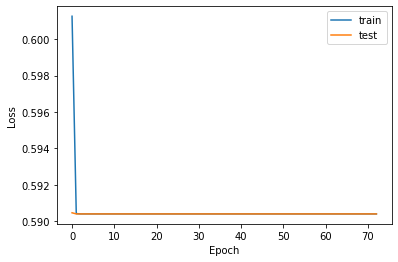

==============minmax===================
MAPE test is : 0.9999999999793469
MAPE test invert is : 0.7636200820497298
==============zscore===================
MAPE test is : 7921429172.835912
MAPE test invert is : 0.6195642029858289
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -3.4711811203180787e-10
R2 test invert is : -3.4711811203180787e-10


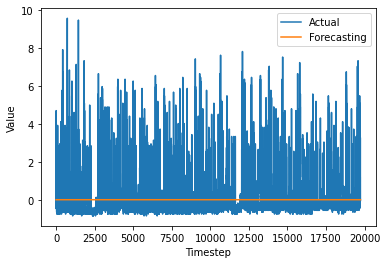

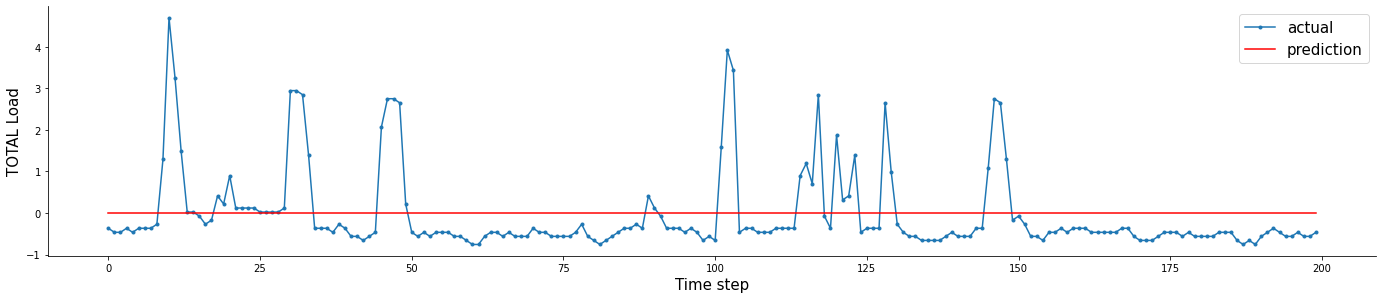

Epoch 1/73
198/198 [==============================] - 15s 25ms/step - loss: 0.6047 - val_loss: 0.5905
Epoch 2/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 3/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 4/73
198/198 [==============================] - 4s 21ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 5/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 6/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 7/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 8/73
198/198 [==============================] - 4s 20ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 9/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 10/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_l

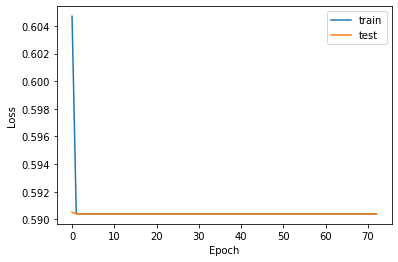

==============minmax===================
MAPE test is : 0.9999999999816493
MAPE test invert is : 0.763620082038956
==============zscore===================
MAPE test is : 8915431537.605112
MAPE test invert is : 0.6195642029871168
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -3.471185561210177e-10
R2 test invert is : -3.4711811203180787e-10


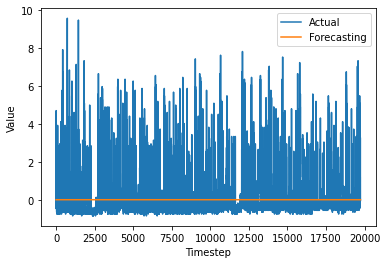

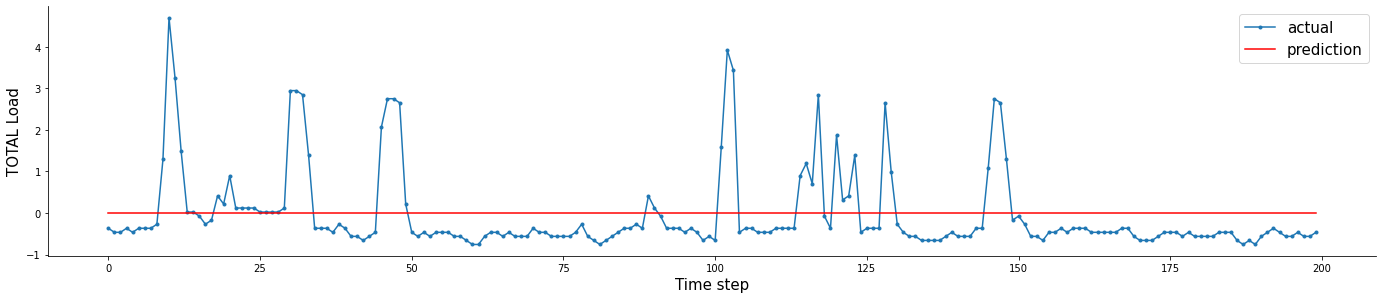

Epoch 1/73
198/198 [==============================] - 15s 24ms/step - loss: 0.6130 - val_loss: 0.5906
Epoch 2/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5905 - val_loss: 0.5904
Epoch 3/73
198/198 [==============================] - 4s 21ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 4/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 5/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 6/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 7/73
198/198 [==============================] - 4s 20ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 8/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 9/73
198/198 [==============================] - 3s 16ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 10/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_l

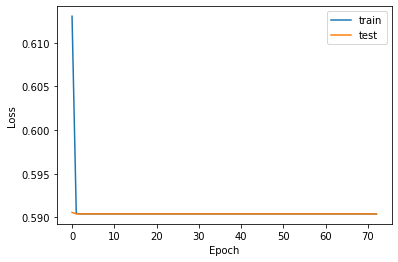

==============minmax===================
MAPE test is : 0.9999999999826921
MAPE test invert is : 0.7636200820340779
==============zscore===================
MAPE test is : 9452473017.46994
MAPE test invert is : 0.6195642029876999
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -3.471183340764128e-10
R2 test invert is : -3.471183340764128e-10


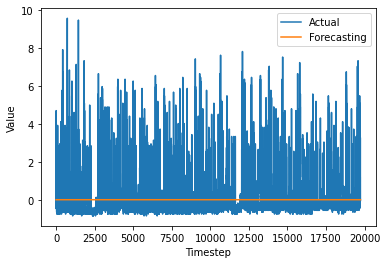

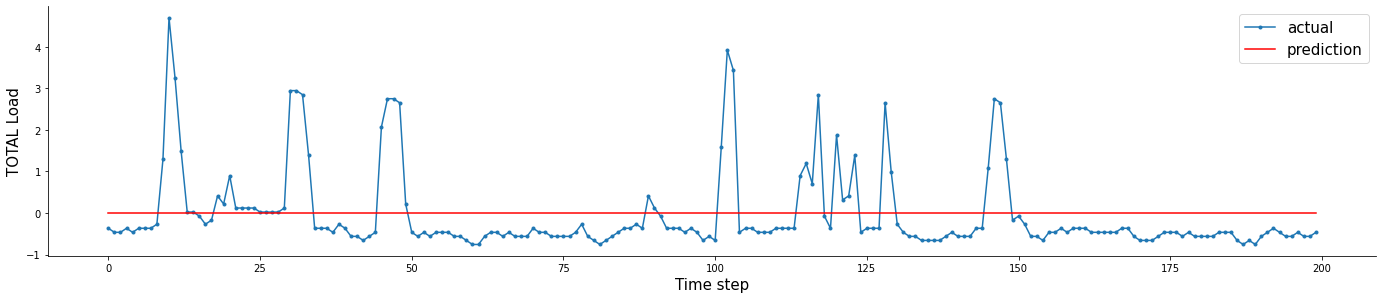

Epoch 1/73
198/198 [==============================] - 13s 24ms/step - loss: 0.5995 - val_loss: 0.5904
Epoch 2/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 3/73
198/198 [==============================] - 4s 18ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 4/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 5/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 6/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 7/73
198/198 [==============================] - 3s 14ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 8/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 9/73
198/198 [==============================] - 4s 19ms/step - loss: 0.5904 - val_loss: 0.5904
Epoch 10/73
198/198 [==============================] - 3s 15ms/step - loss: 0.5904 - val_l

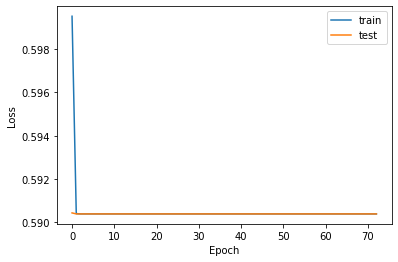

==============minmax===================
MAPE test is : 0.9999999999801039
MAPE test invert is : 0.7636200820461875
==============zscore===================
MAPE test is : 8222857913.417339
MAPE test invert is : 0.6195642029862523
RMSE Testing is : 1.000
RMSE Testing invert is : 102.525
R2 test is : -3.4711811203180787e-10
R2 test invert is : -3.4711811203180787e-10


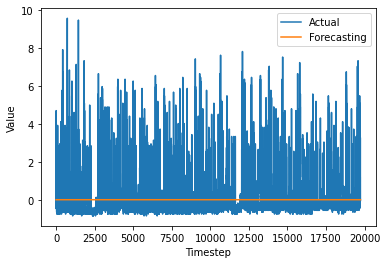

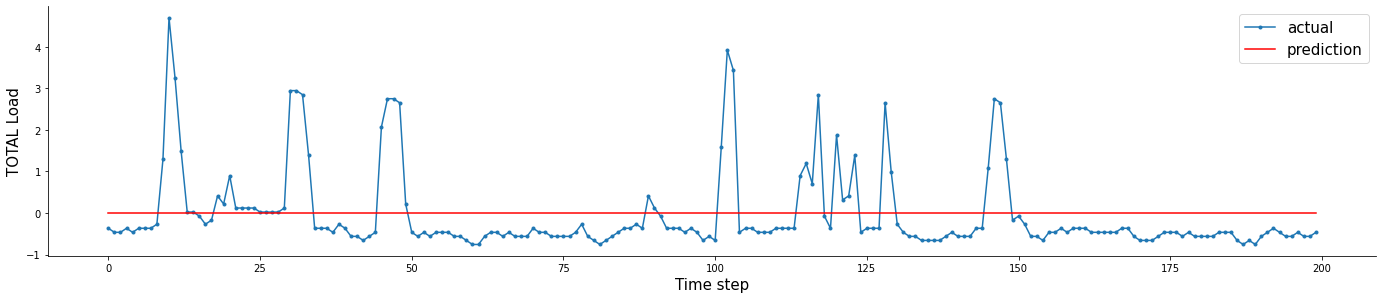

In [24]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto8
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(53, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mae', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=73, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto8") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto8")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto8")

## sig minmax

Epoch 1/73
198/198 [==============================] - 13s 24ms/step - loss: 0.0594 - val_loss: 0.0488
Epoch 2/73
198/198 [==============================] - 3s 13ms/step - loss: 0.0500 - val_loss: 0.0494
Epoch 3/73
198/198 [==============================] - 3s 13ms/step - loss: 0.0494 - val_loss: 0.0488
Epoch 4/73
198/198 [==============================] - 3s 17ms/step - loss: 0.0490 - val_loss: 0.0487
Epoch 5/73
198/198 [==============================] - 4s 20ms/step - loss: 0.0488 - val_loss: 0.0497
Epoch 6/73
198/198 [==============================] - 3s 13ms/step - loss: 0.0488 - val_loss: 0.0476
Epoch 7/73
198/198 [==============================] - 3s 13ms/step - loss: 0.0486 - val_loss: 0.0485
Epoch 8/73
198/198 [==============================] - 3s 17ms/step - loss: 0.0485 - val_loss: 0.0490
Epoch 9/73
198/198 [==============================] - 4s 20ms/step - loss: 0.0484 - val_loss: 0.0487
Epoch 10/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0483 - val_l

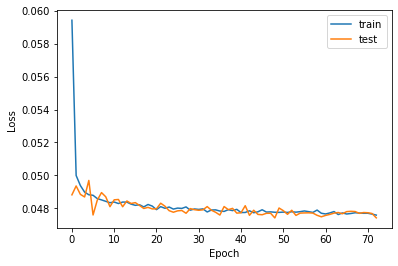

==============minmax===================
MAPE test is : 115187695083.56541
MAPE test invert is : 0.45157276434751686
==============zscore===================
MAPE test is : 0.8455677244422207
MAPE test invert is : 0.724784602025743
RMSE Testing is : 0.099
RMSE Testing invert is : 106.198
R2 test is : -0.07294284562772613
R2 test invert is : -0.0729428456277259


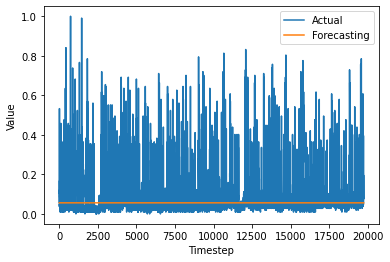

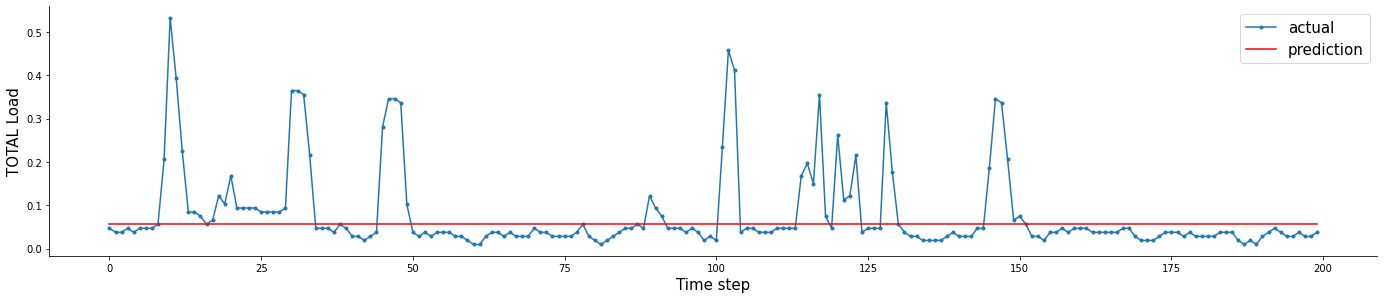

Epoch 1/73
198/198 [==============================] - 19s 26ms/step - loss: 0.0589 - val_loss: 0.0490
Epoch 2/73
198/198 [==============================] - 4s 21ms/step - loss: 0.0503 - val_loss: 0.0484
Epoch 3/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0495 - val_loss: 0.0486
Epoch 4/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0492 - val_loss: 0.0492
Epoch 5/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0491 - val_loss: 0.0494
Epoch 6/73
198/198 [==============================] - 4s 21ms/step - loss: 0.0488 - val_loss: 0.0493
Epoch 7/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0489 - val_loss: 0.0484
Epoch 8/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0487 - val_loss: 0.0484
Epoch 9/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0487 - val_loss: 0.0492
Epoch 10/73
198/198 [==============================] - 4s 21ms/step - loss: 0.0487 - val_l

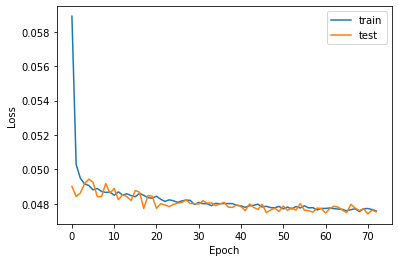

==============minmax===================
MAPE test is : 116112395649.71616
MAPE test invert is : 0.45637888694512624
==============zscore===================
MAPE test is : 0.840799899346419
MAPE test invert is : 0.7215186078321677
RMSE Testing is : 0.099
RMSE Testing invert is : 106.073
R2 test is : -0.07042692470103562
R2 test invert is : -0.0704269247010354


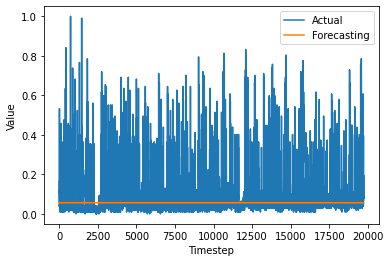

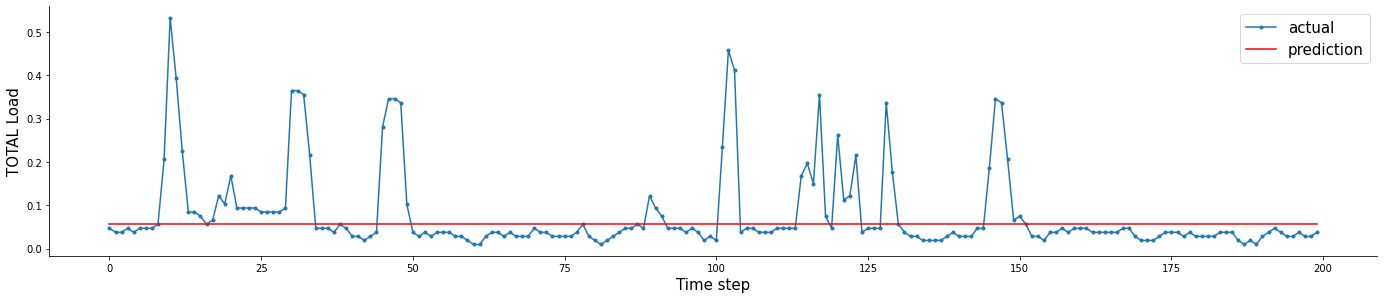

Epoch 1/73
198/198 [==============================] - 14s 22ms/step - loss: 0.0820 - val_loss: 0.0488
Epoch 2/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0506 - val_loss: 0.0480
Epoch 3/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0498 - val_loss: 0.0491
Epoch 4/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0496 - val_loss: 0.0485
Epoch 5/73
198/198 [==============================] - 3s 18ms/step - loss: 0.0494 - val_loss: 0.0477
Epoch 6/73
198/198 [==============================] - 4s 18ms/step - loss: 0.0492 - val_loss: 0.0487
Epoch 7/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0490 - val_loss: 0.0484
Epoch 8/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0489 - val_loss: 0.0486
Epoch 9/73
198/198 [==============================] - 3s 14ms/step - loss: 0.0487 - val_loss: 0.0489
Epoch 10/73
198/198 [==============================] - 3s 18ms/step - loss: 0.0486 - val_l

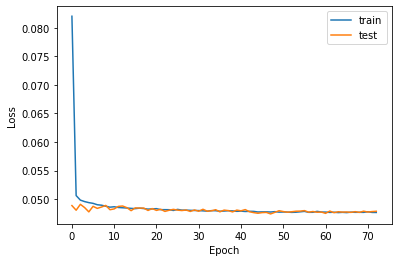

==============minmax===================
MAPE test is : 118770202012.51054
MAPE test invert is : 0.4701928108118212
==============zscore===================
MAPE test is : 0.8275094054158098
MAPE test invert is : 0.7123751290014532
RMSE Testing is : 0.099
RMSE Testing invert is : 105.727
R2 test is : -0.06344141512208812
R2 test invert is : -0.06344141512208834


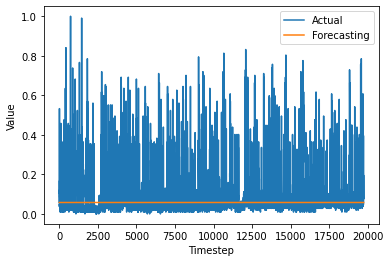

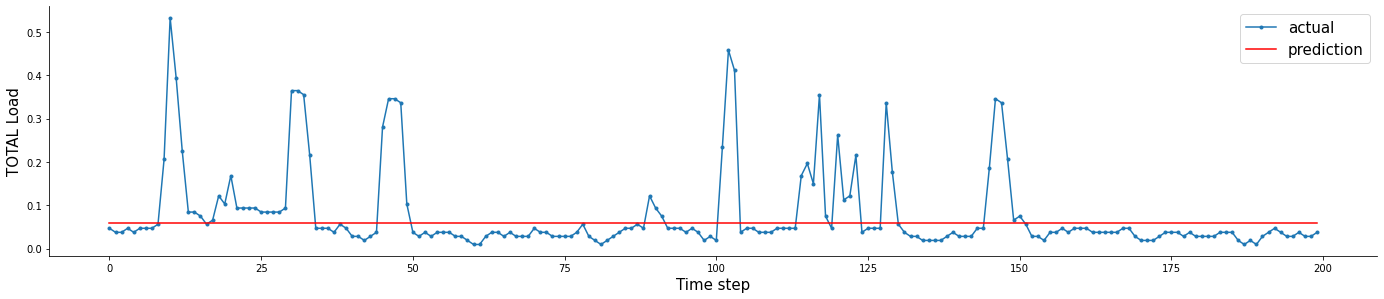

Epoch 1/73
198/198 [==============================] - 15s 23ms/step - loss: 0.0595 - val_loss: 0.0497
Epoch 2/73
198/198 [==============================] - 4s 22ms/step - loss: 0.0504 - val_loss: 0.0487
Epoch 3/73
198/198 [==============================] - 3s 15ms/step - loss: 0.0495 - val_loss: 0.0492
Epoch 4/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0492 - val_loss: 0.0487
Epoch 5/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0491 - val_loss: 0.0489
Epoch 6/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0491 - val_loss: 0.0492
Epoch 7/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0489 - val_loss: 0.0488
Epoch 8/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0488 - val_loss: 0.0487
Epoch 9/73
198/198 [==============================] - 4s 20ms/step - loss: 0.0489 - val_loss: 0.0490
Epoch 10/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0489 - val_l

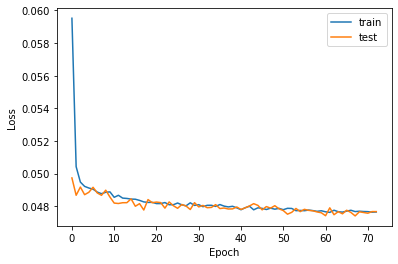

==============minmax===================
MAPE test is : 117339652315.78027
MAPE test invert is : 0.46275754205981995
==============zscore===================
MAPE test is : 0.8345881219725984
MAPE test invert is : 0.7172523197606042
RMSE Testing is : 0.099
RMSE Testing invert is : 105.911
R2 test is : -0.067155998359123
R2 test invert is : -0.06715599835912323


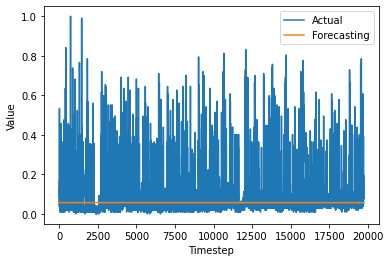

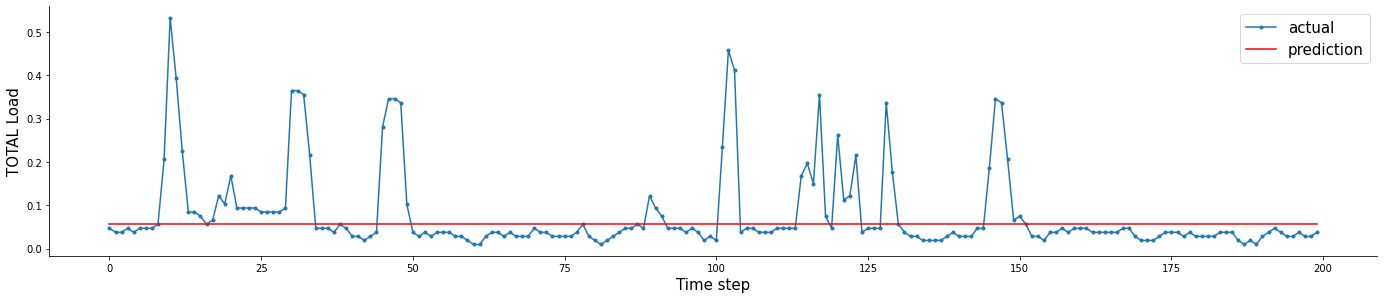

Epoch 1/73
198/198 [==============================] - 16s 29ms/step - loss: 0.0624 - val_loss: 0.0497
Epoch 2/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0504 - val_loss: 0.0491
Epoch 3/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0494 - val_loss: 0.0493
Epoch 4/73
198/198 [==============================] - 4s 21ms/step - loss: 0.0491 - val_loss: 0.0486
Epoch 5/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0490 - val_loss: 0.0490
Epoch 6/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0489 - val_loss: 0.0489
Epoch 7/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0488 - val_loss: 0.0488
Epoch 8/73
198/198 [==============================] - 4s 21ms/step - loss: 0.0488 - val_loss: 0.0487
Epoch 9/73
198/198 [==============================] - 4s 19ms/step - loss: 0.0486 - val_loss: 0.0484
Epoch 10/73
198/198 [==============================] - 3s 16ms/step - loss: 0.0486 - val_l

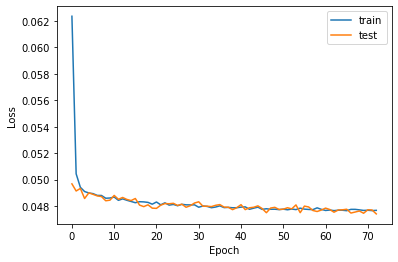

==============minmax===================
MAPE test is : 114690576328.53664
MAPE test invert is : 0.44955785957191435
==============zscore===================
MAPE test is : 0.8488291555042577
MAPE test invert is : 0.7271299649753624
RMSE Testing is : 0.099
RMSE Testing invert is : 106.266
R2 test is : -0.07431365311413196
R2 test invert is : -0.07431365311413196


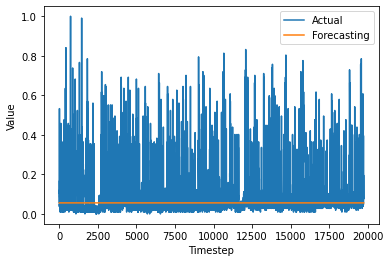

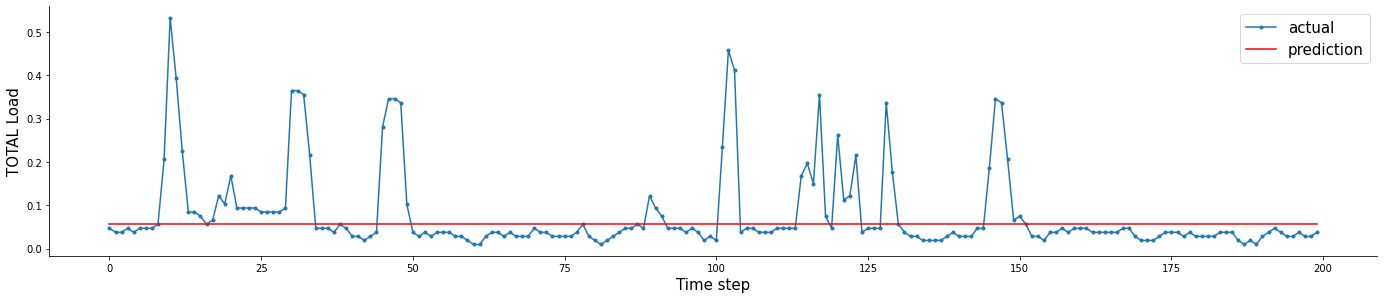

In [45]:
# mp, mpinvert, rms,  rmsinvert, r, rinvert= list()
!mkdir foto7
import shutil
for i in range(5):
  #split into train and test sets
  values = reframed.values
  # n_train = round(values.shape[0])

  train = values[:, :]
  test = values[:, :]

  #!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  train_X, train_y = train[:, :-1], train[:, -1]
  test_X, test_y = test[:, :-1], test[:, -1]

  # reshap input menjadi 3D ([)samples, timesteps, features)
  train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
  test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))


  #design network SimpleRNN
  model = Sequential()
  model.add(SimpleRNN(53, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), activation = 'sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(SimpleRNN(units = 53, return_sequences = True, activation='sigmoid'))
  model.add(Dropout(0.2))

  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='mae', optimizer='rmsprop')


  #fit network
  start = time.time()
  history = model.fit(train_X, train_y, epochs=73, batch_size=100, validation_data=(test_X, test_y), verbose=1, shuffle=False)
  end = time.time()
  print('Processing Time {} seconds.'.format(end-start))


  #plot history
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.xlabel('Epoch')
  pyplot.ylabel('Loss')
  pyplot.legend()
  pyplot.show()
  # pyplot.close()
  # file_name = str(i+1)+'a.png'
  pyplot.savefig(str(i+1)+'a.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'a.png'
  shutil.move(path, "/content/foto7") 

  #membuat prediksi training
  xhat = model.predict(train_X)
  xhat = xhat.reshape((xhat.shape[0], xhat.shape[2]))
  train_X = train_X.reshape((train_X.shape[0], train_X.shape[2]))

  #invert scaling untuk peramalan
  inv_xhat = concatenate((xhat, train_X[:, 1:]), axis=1)
  inv_xhat = scaler.inverse_transform(inv_xhat)
  inv_xhat = inv_xhat[:,0]

  #invert scaling untuk aktual
  train_y = train_y.reshape((len(train_y), 1))
  inv_x = concatenate((train_y, train_X[:, 1:]), axis=1)
  inv_x = scaler.inverse_transform(inv_x)
  inv_x = inv_x[:,0]

  #================================================================#

  #membuat prediksi testing
  yhat = model.predict(test_X)
  yhat = yhat.reshape((yhat.shape[0], yhat.shape[2]))
  test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

  #invert scaling untuk peramalan
  inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
  inv_yhat = scaler.inverse_transform(inv_yhat)
  inv_yhat = inv_yhat[:,0]

  #invert scaling untuk aktual
  test_y = test_y.reshape((len(test_y), 1))
  inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
  inv_y = scaler.inverse_transform(inv_y)
  inv_y = inv_y[:,0]



  # calculate RMSE

  np.seterr(divide='ignore', invalid='ignore')

  print('==============minmax===================')
  print(f'MAPE test is : {(mape(test_y, yhat))}')
  print(f'MAPE test invert is : {(mape(inv_y, inv_yhat))}')

  print('==============zscore===================')
  print(f'MAPE test is : {(mape(yhat, test_y))}')
  print(f'MAPE test invert is : {(mape(inv_yhat, inv_y))}')

  print('=======================================')
  rmsetest = np.sqrt(mean_squared_error(yhat, test_y))
  print(f'RMSE Testing is : %.3f' % rmsetest)
  rmsetestinvert = np.sqrt(mean_squared_error(inv_yhat, inv_y))
  print(f'RMSE Testing invert is : %.3f' % rmsetestinvert)

  print(f'R2 test is : {r2_score(test_y, yhat)}')
  print(f'R2 test invert is : {r2_score(inv_y, inv_yhat)}')



  # plot history
  pyplot.plot(test_y, label='Actual')
  pyplot.plot(yhat, label='Forecasting')
  pyplot.xlabel('Timestep')
  pyplot.ylabel('Value')
  pyplot.legend()
  pyplot.show()
  pyplot.savefig(str(i+1)+'b.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'b.png'
  shutil.move(path, "/content/foto7")

  idx = 200#int(len(yhat))
  aa=[x for x in range(idx)]
  pyplot.figure(figsize=(20,4))
  pyplot.plot(aa, test_y[:idx], marker='.', label="actual")
  pyplot.plot(aa, yhat[:idx], 'r', label="prediction")
  # plt.tick_params(left=False, labelleft=True) #remove ticks
  pyplot.tight_layout()
  sns.despine(top=True)
  pyplot.subplots_adjust(left=0.07)
  pyplot.ylabel('TOTAL Load', size=15)
  pyplot.xlabel('Time step', size=15)
  pyplot.legend(fontsize=15)
  pyplot.show()
  pyplot.savefig(str(i+1)+'c.png')
  pyplot.close()
  path = '/content/'+str(i+1)+'c.png'
  shutil.move(path, "/content/foto7")